<a href="https://colab.research.google.com/github/Mohammad-Kaosain-Akbar/Update-25th-May-22/blob/main/LGBM/LGBM%20with%20many%20inputs/Applying_LGBM_on_Grenoble_Dataset_from_17_to_19_(many_inputs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (25,10)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Mohammad-Kaosain-Akbar/NILM-two-years-dataset/main/Data_Greener_all.csv')
df['Time']= pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               43824 non-null  datetime64[ns]
 1   Ventilation        43824 non-null  float64       
 2   Sokets plug        43824 non-null  float64       
 3   Lighting           43824 non-null  float64       
 4   Other electricity  43824 non-null  float64       
 5   Cooling            43824 non-null  float64       
 6   Heating            43824 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.3 MB


In [3]:
Total = df["Ventilation"] + df["Sokets plug"] + df["Lighting"] + df["Other electricity"] + df["Cooling"] + df["Heating"]
# https://www.kite.com/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python

df["Total"] = Total

In [4]:
df

Time  Ventilation  Sokets plug  Lighting  \
0     2017-01-03 13:00:00         27.4         41.8      53.7   
1     2017-01-03 14:00:00         21.6         37.5      50.9   
2     2017-01-03 15:00:00         18.5         37.4      60.1   
3     2017-01-03 16:00:00         29.7         38.0      52.6   
4     2017-01-03 17:00:00         16.7         38.1      56.7   
...                   ...          ...          ...       ...   
43819 2022-01-03 08:00:00         59.3         17.9      16.6   
43820 2022-01-03 09:00:00         71.9         20.6      33.1   
43821 2022-01-03 10:00:00         90.5         30.9      47.8   
43822 2022-01-03 11:00:00         94.0         33.9      52.2   
43823 2022-01-03 12:00:00         95.3         28.5      36.3   

       Other electricity  Cooling  Heating   Total  
0                   89.6    18.60    498.0  729.10  
1                   64.6    61.90    500.0  736.50  
2                   64.2    16.50    480.0  676.70  
3                   43.2    19.80    390.0  573.30  
4                   42.4    15.20    373.0  542.10  
...                  ...      ...      ...     ...  
43819              115.0    12.70    344.0  565.50  
43820              149.0    11.90    399.0  685.50  
43821              157.0    12.90    397.0  736.10  
43822              155.0    15.40    345.0  695.50  
43823              107.0     7.88    272.0  546.98  

[43824 rows x 8 columns]

In [5]:
df.describe()

Ventilation   Sokets plug      Lighting  Other electricity  \
count  43824.000000  43824.000000  43824.000000       43824.000000   
mean      32.433825     18.414002     14.316892          87.846242   
std       36.211287     27.666459     15.064466          94.951663   
min        0.000000      0.000000      0.000000           0.000000   
25%        7.000000     11.400000      3.690000          35.800000   
50%       14.100000     13.600000      6.500000          79.600000   
75%       56.800000     20.100000     22.500000         103.000000   
max      793.000000    980.000000    132.000000         971.000000   

            Cooling       Heating         Total  
count  43824.000000  43824.000000  43824.000000  
mean      47.084925     68.994602    269.090489  
std       71.422794    113.328362    180.713964  
min        0.000000      0.000000      3.130000  
25%       13.600000      5.500000    151.377500  
50%       21.500000     12.300000    208.180000  
75%       51.600000     89.000000    336.000000  
max     1641.000000   1120.000000   2037.000000

In [6]:
df['Year'] = df['Time'].dt.year
df['Month']=df['Time'].dt.month
df['Quarter_of_year']=df['Time'].dt.quarter
df['Day_of_week']=df['Time'].dt.day_of_week
df['Week_of_year']=df['Time'].dt.week
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour

df.drop('Time', inplace=True, axis=1)

In [7]:
df

Ventilation  Sokets plug  Lighting  Other electricity  Cooling  \
0             27.4         41.8      53.7               89.6    18.60   
1             21.6         37.5      50.9               64.6    61.90   
2             18.5         37.4      60.1               64.2    16.50   
3             29.7         38.0      52.6               43.2    19.80   
4             16.7         38.1      56.7               42.4    15.20   
...            ...          ...       ...                ...      ...   
43819         59.3         17.9      16.6              115.0    12.70   
43820         71.9         20.6      33.1              149.0    11.90   
43821         90.5         30.9      47.8              157.0    12.90   
43822         94.0         33.9      52.2              155.0    15.40   
43823         95.3         28.5      36.3              107.0     7.88   

       Heating   Total  Year  Month  Quarter_of_year  Day_of_week  \
0        498.0  729.10  2017      1                1            1   
1        500.0  736.50  2017      1                1            1   
2        480.0  676.70  2017      1                1            1   
3        390.0  573.30  2017      1                1            1   
4        373.0  542.10  2017      1                1            1   
...        ...     ...   ...    ...              ...          ...   
43819    344.0  565.50  2022      1                1            0   
43820    399.0  685.50  2022      1                1            0   
43821    397.0  736.10  2022      1                1            0   
43822    345.0  695.50  2022      1                1            0   
43823    272.0  546.98  2022      1                1            0   

       Week_of_year  Day  Hour  
0                 1    3    13  
1                 1    3    14  
2                 1    3    15  
3                 1    3    16  
4                 1    3    17  
...             ...  ...   ...  
43819             1    3     8  
43820             1    3     9  
43821             1    3    10  
43822             1    3    11  
43823             1    3    12  

[43824 rows x 14 columns]

In [8]:
df1_train = df.loc[(df['Year'].isin([2017,2018]))]
 
##################################################################
 
df1_test = df.loc[(df['Year'].isin([2019]))]  # general model
 
df2_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([6,7,8,9]))]  # summer
 
df3_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([12,1,2,3]))]  # winter
 
df4_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([1,2,3,4,5,6,7,8]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # early morning 1am to 8 am
 
df5_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([9,10,11,12,13,14,15,16,17,18,19]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # working hours 9am to 7pm
 
df6_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([20,21,22,23,0]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  #night hours 8 pm to 12 am
 
df7_test = df.loc[(df['Year'].isin([2019]))&(df['Day_of_week'].isin([5,6]))]  # weekend
 
 
print('df_train.shape: ', df1_train.shape)
print('df_test.shape: ', df1_test.shape)
 


df_train.shape:  (17459, 14)
df_test.shape:  (8760, 14)


In [9]:
X_train1 = df1_train[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_train1 = df1_train[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
X_test1 = df1_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df1_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

(17459, 8) (17459, 6) (8760, 8) (8760, 6)


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1=sc.fit_transform(X_test1)

In [11]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor

model = MultiOutputRegressor(KNeighborsRegressor())
model.fit(X_train1, y_train1)

MultiOutputRegressor(estimator=KNeighborsRegressor())

In [12]:
pred = model.predict(X_test1)


**GENERAL**

In [13]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

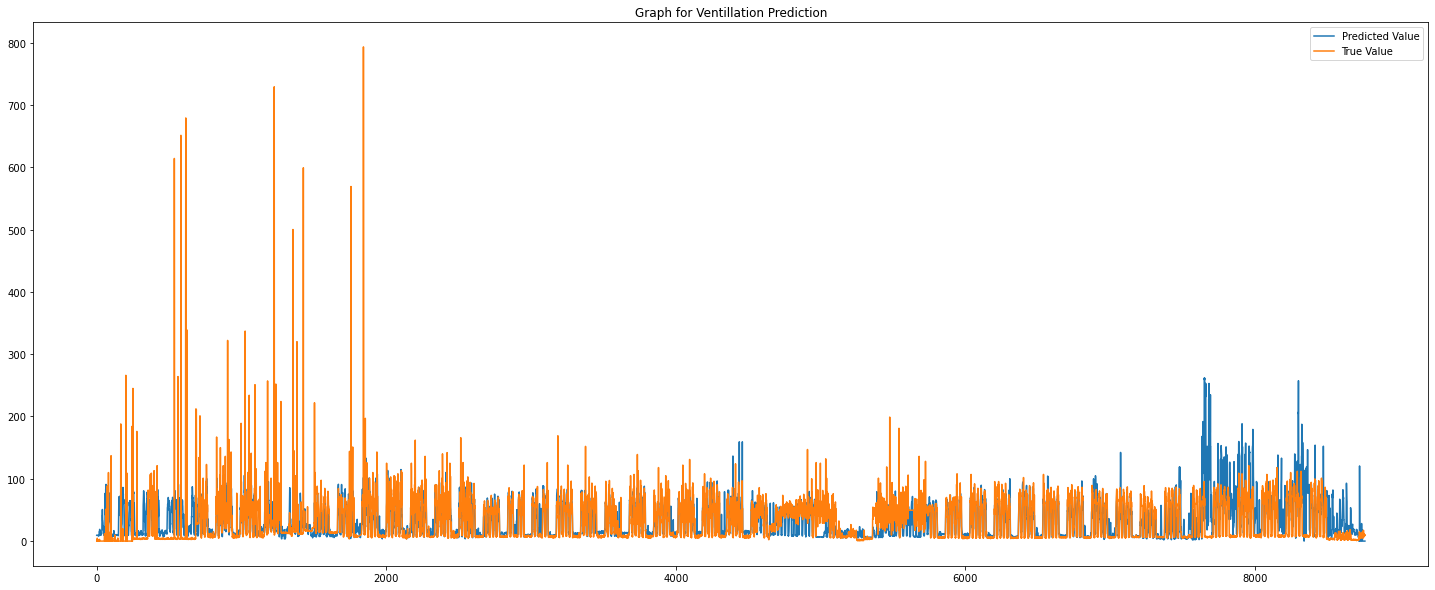

In [14]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [15]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  17.902185616438352

Root Mean Sqaured Error is:  35.36520506531757

R2 score is:  0.0834659960527614


In [16]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

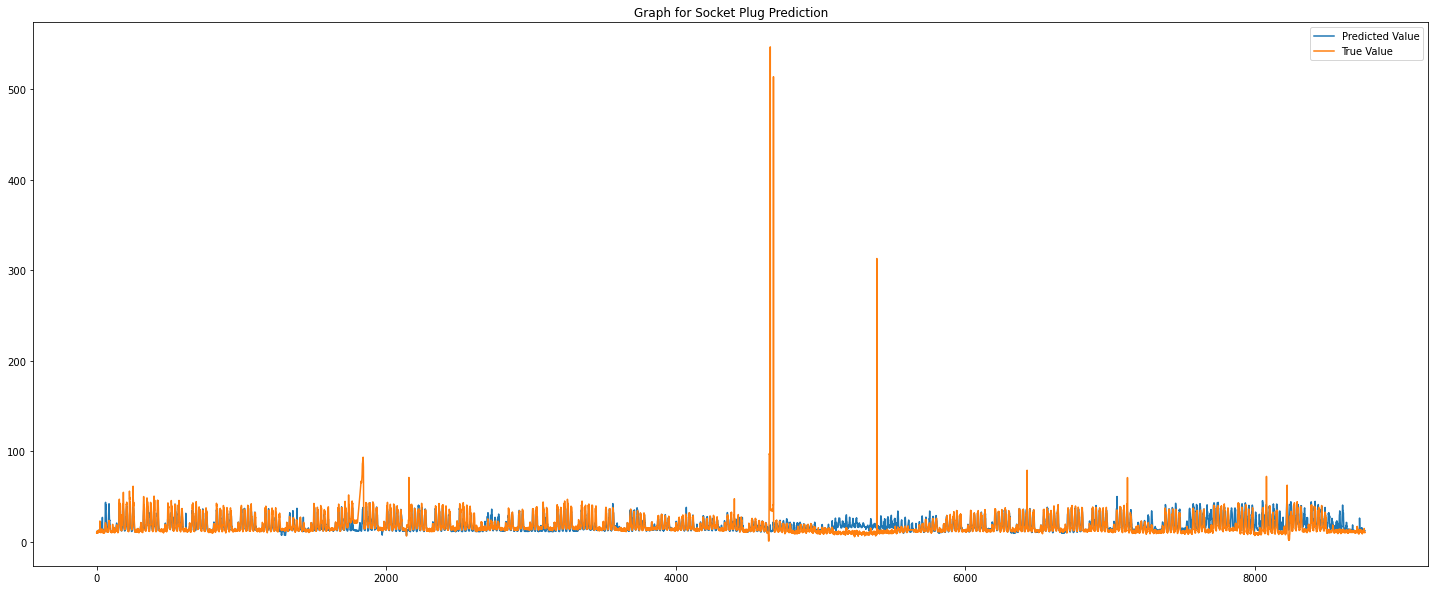

In [17]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [18]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.054424543378995

Root Mean Sqaured Error is:  11.102824119185863

R2 score is:  0.26232823943773476


In [19]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

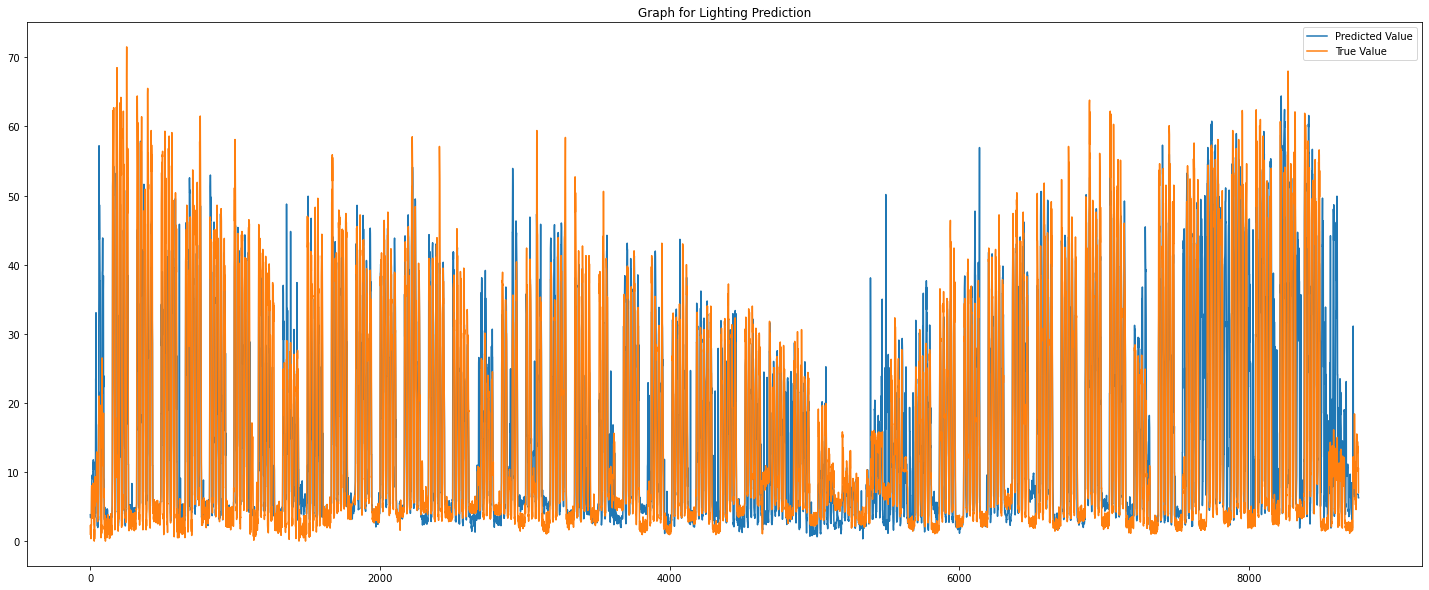

In [20]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [21]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.989083949771689

Root Mean Sqaured Error is:  8.338993264395297

R2 score is:  0.7225572765504664


In [22]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

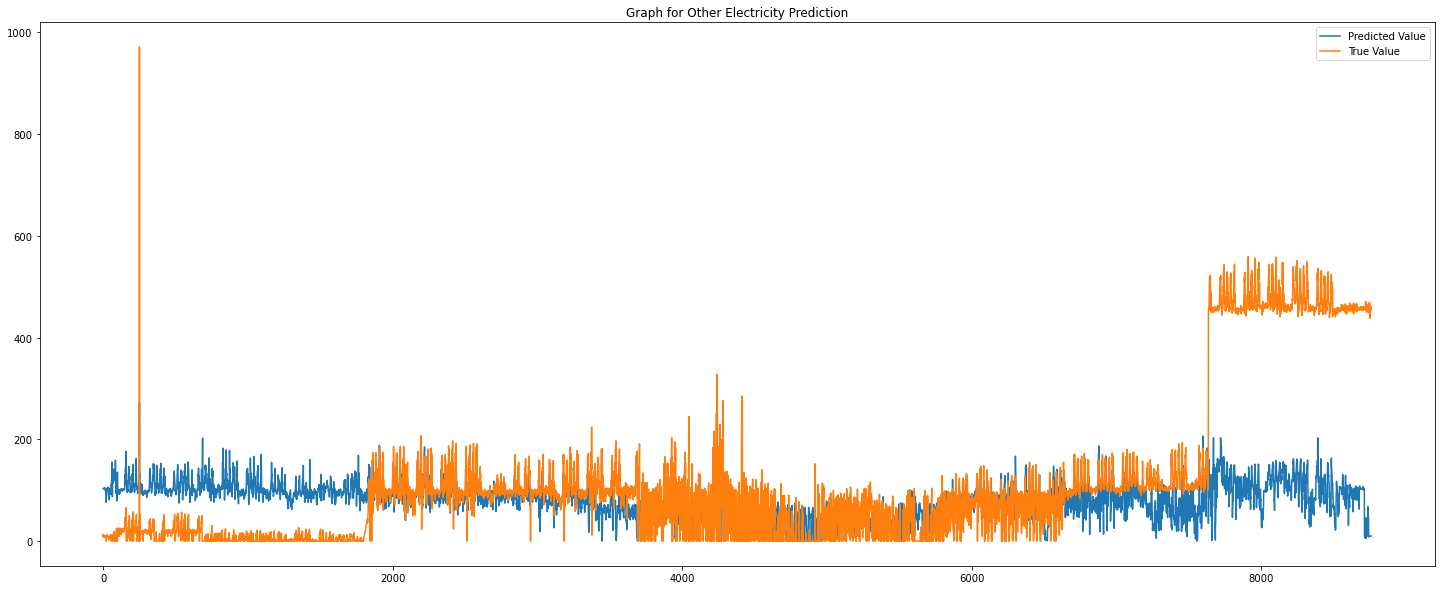

In [23]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [24]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  87.03596196118721

Root Mean Sqaured Error is:  143.62441849614407

R2 score is:  0.009713523104163513


In [25]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

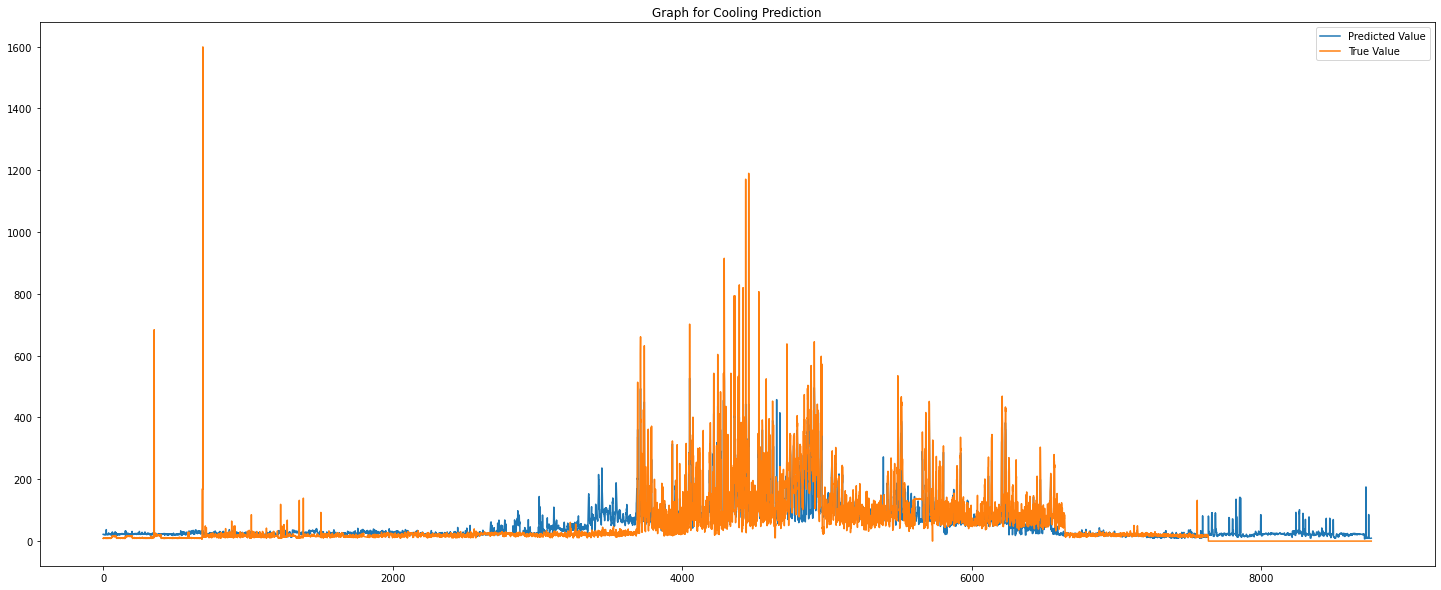

In [26]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [27]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  25.697732191780823

Root Mean Sqaured Error is:  46.658017093430665

R2 score is:  0.7028901151260398


In [28]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

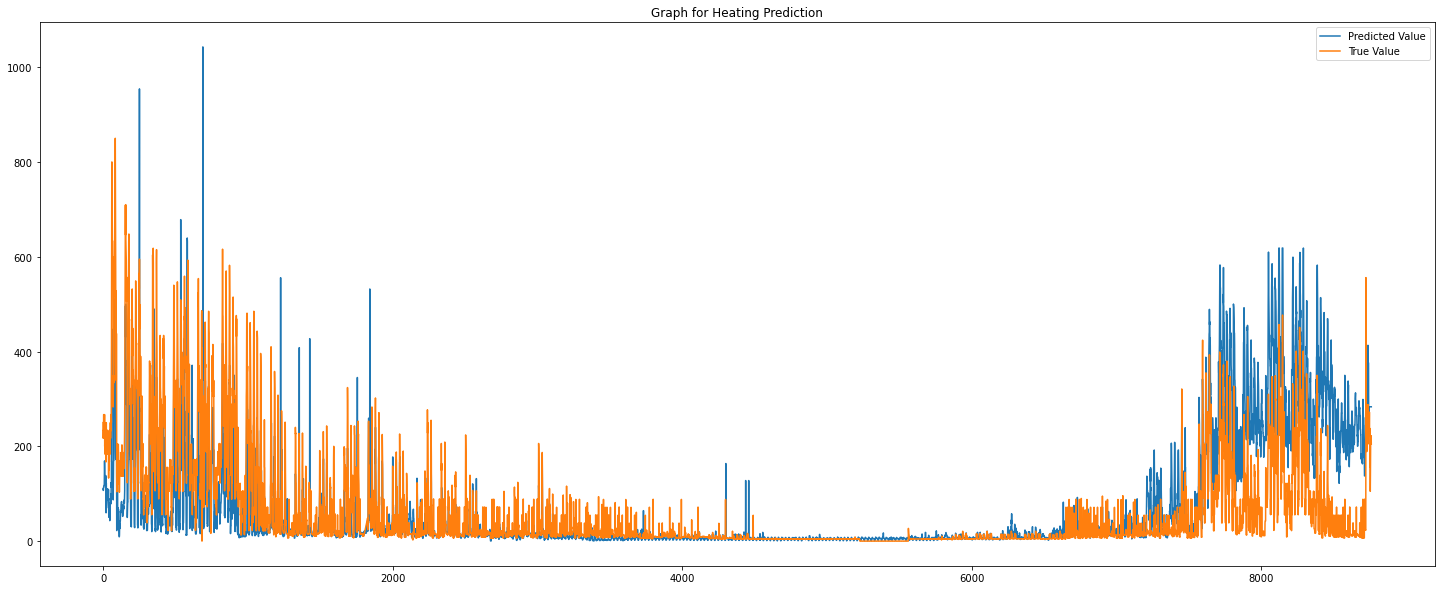

In [29]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [30]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  51.16899728310502

Root Mean Sqaured Error is:  93.213915269926

R2 score is:  0.2275992291079968


**SUMMER**

In [31]:
X_test1 = df2_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df2_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2928, 8) (2928, 6)


In [32]:
X_test1=sc.fit_transform(X_test1)

In [33]:
pred = model.predict(X_test1)

In [34]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

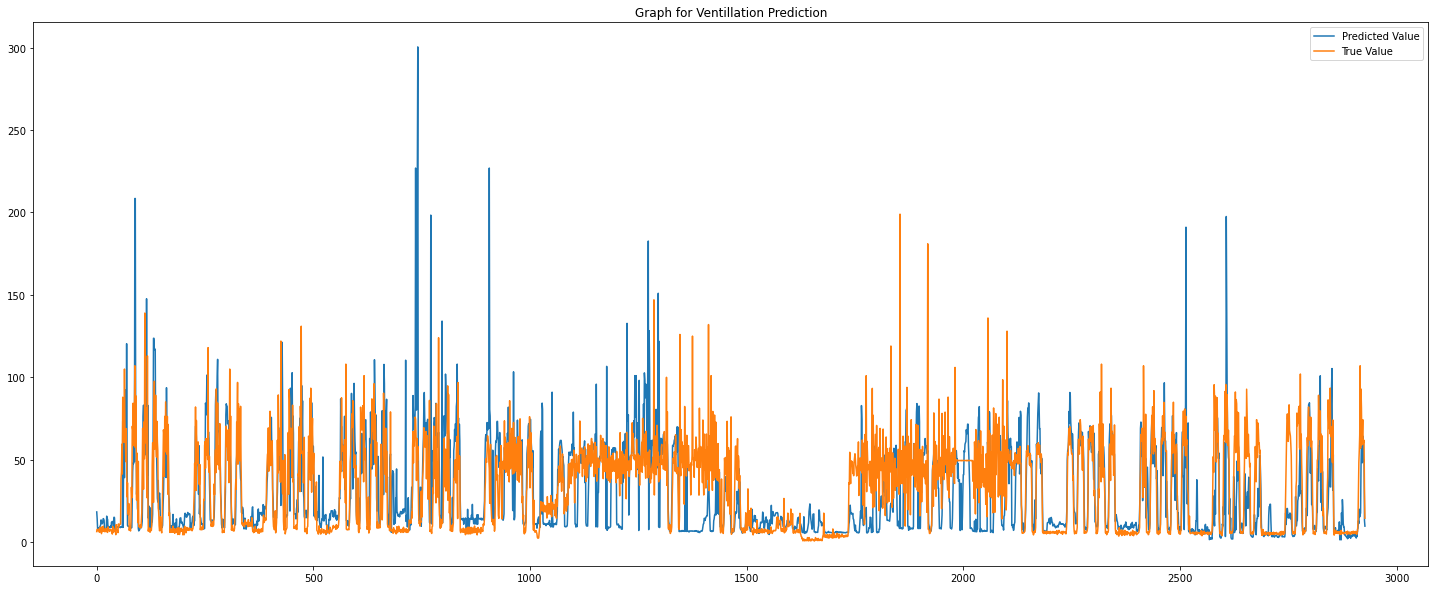

In [35]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [36]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  16.015915163934427

Root Mean Sqaured Error is:  24.891311945576405

R2 score is:  0.0859807640860678


In [37]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

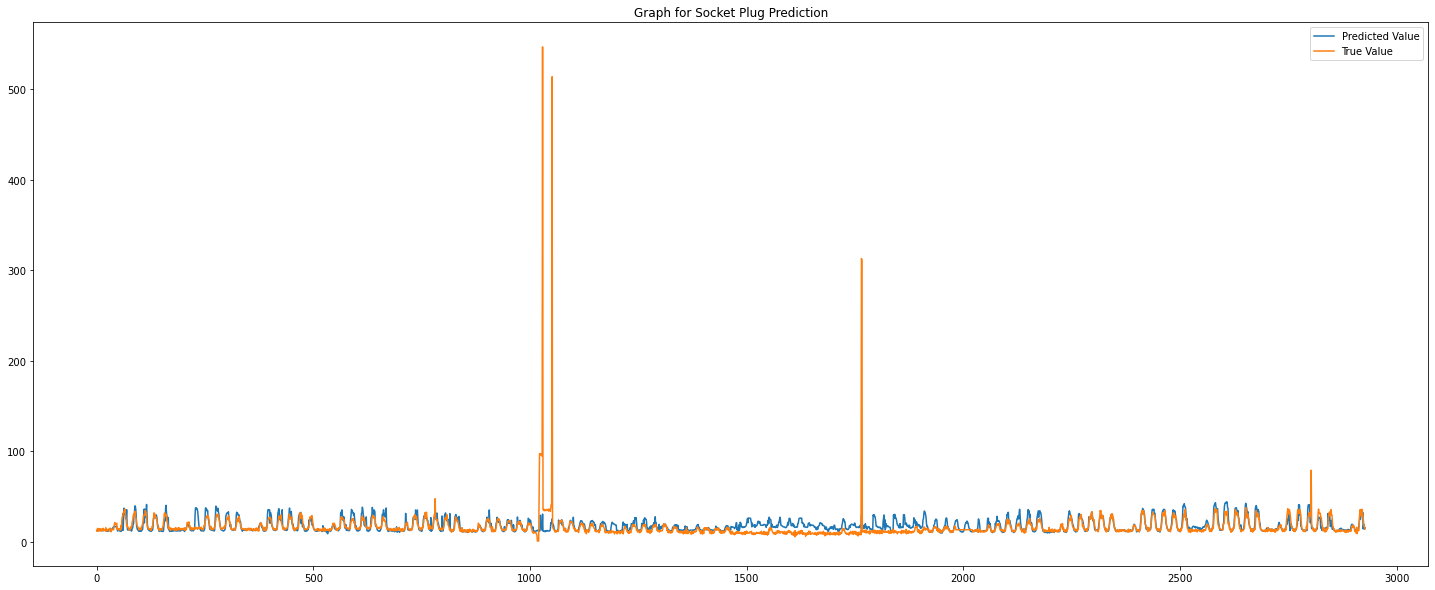

In [38]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [39]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.642281762295082

Root Mean Sqaured Error is:  16.597701142924876

R2 score is:  0.07350153659779102


In [40]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

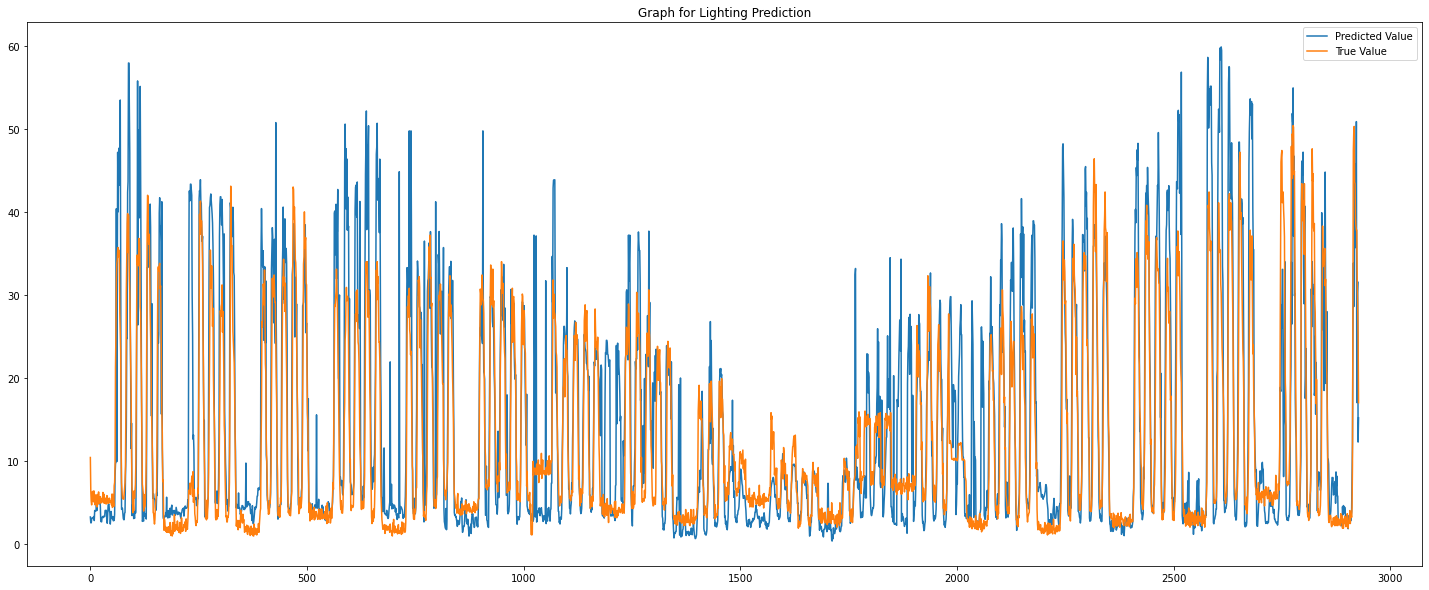

In [41]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [42]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.809787158469946

Root Mean Sqaured Error is:  7.398564369314174

R2 score is:  0.5558295018147381


In [43]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

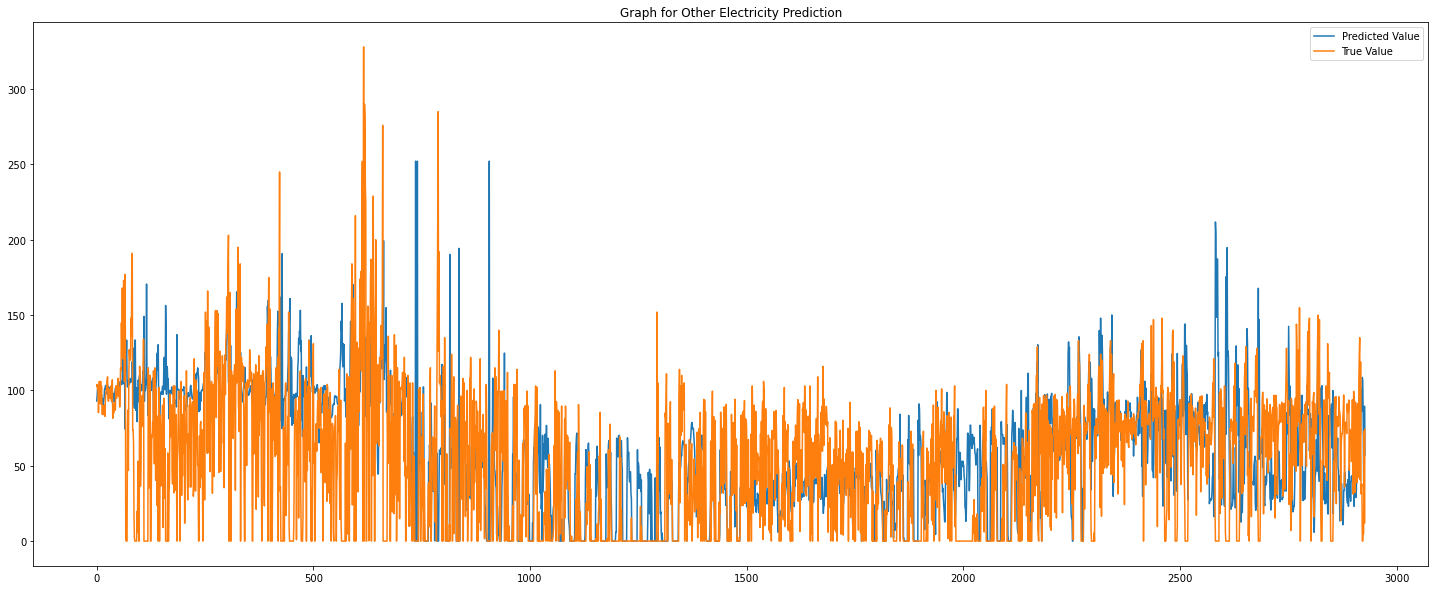

In [44]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [45]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  34.596068217213116

Root Mean Sqaured Error is:  48.62020639088537

R2 score is:  -0.17869058778602076


In [46]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

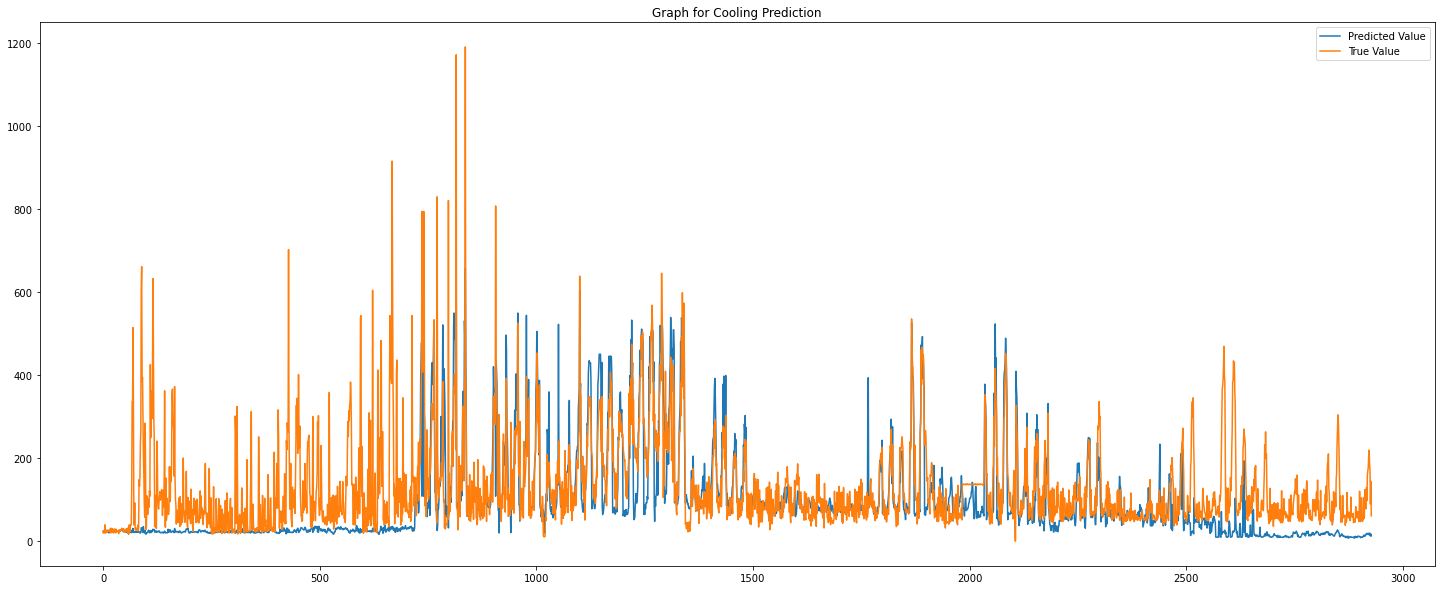

In [47]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [48]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  60.65022882513661

Root Mean Sqaured Error is:  101.0737827071706

R2 score is:  0.15304060186748059


In [49]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

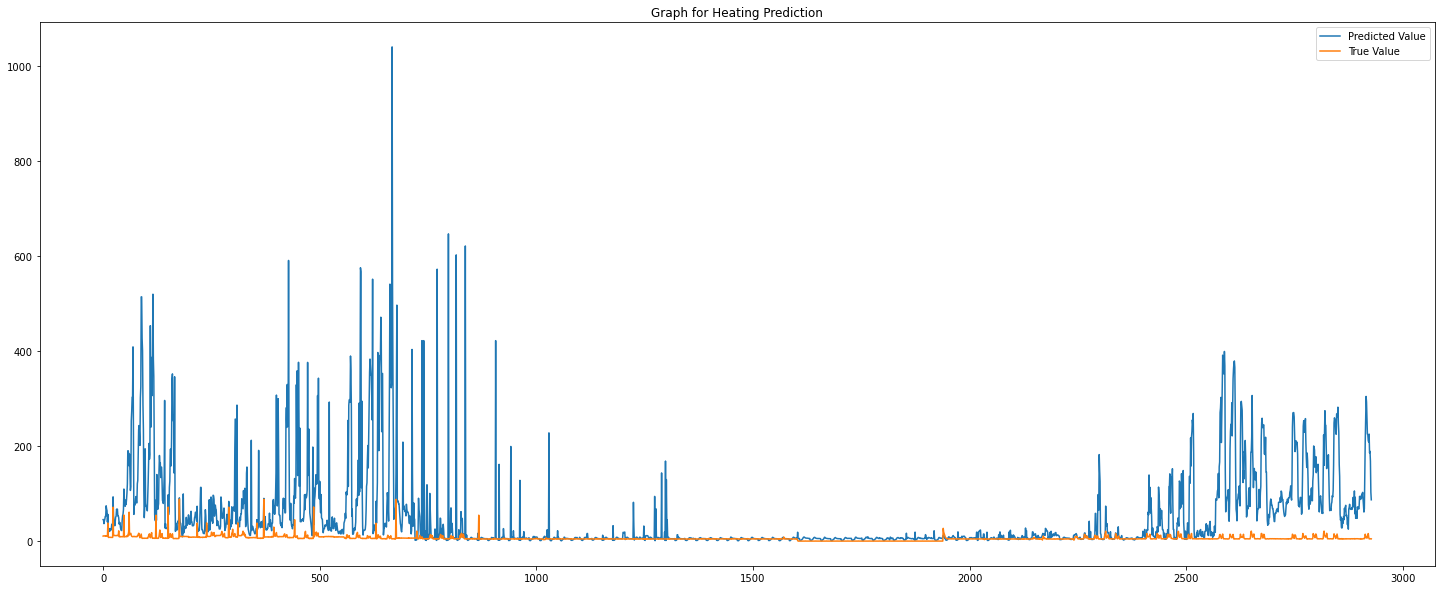

In [50]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [51]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  45.1755625

Root Mean Sqaured Error is:  96.49267287130512

R2 score is:  -296.3748309573651


**WINTER**

In [52]:
X_test1 = df3_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df3_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2903, 8) (2903, 6)


In [53]:
X_test1=sc.fit_transform(X_test1)

In [54]:
pred = model.predict(X_test1)

In [55]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

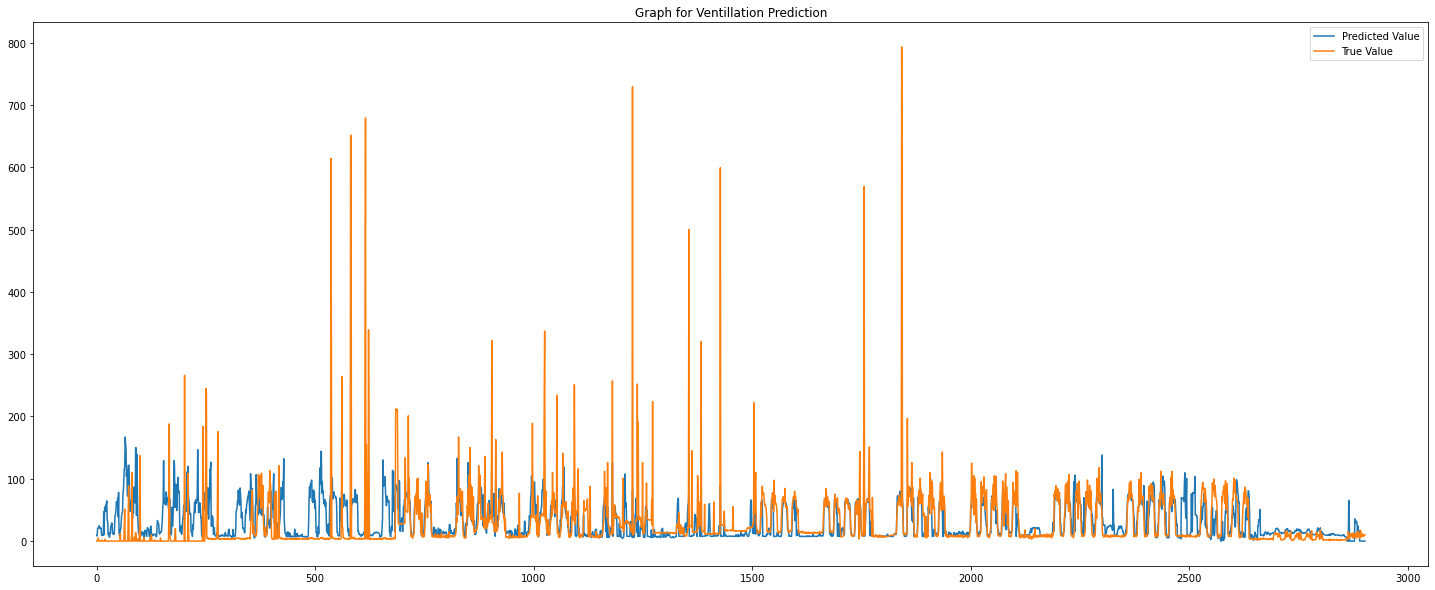

In [56]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [57]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  23.08007309679642

Root Mean Sqaured Error is:  48.655790111880634

R2 score is:  0.07228488767778152


In [58]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

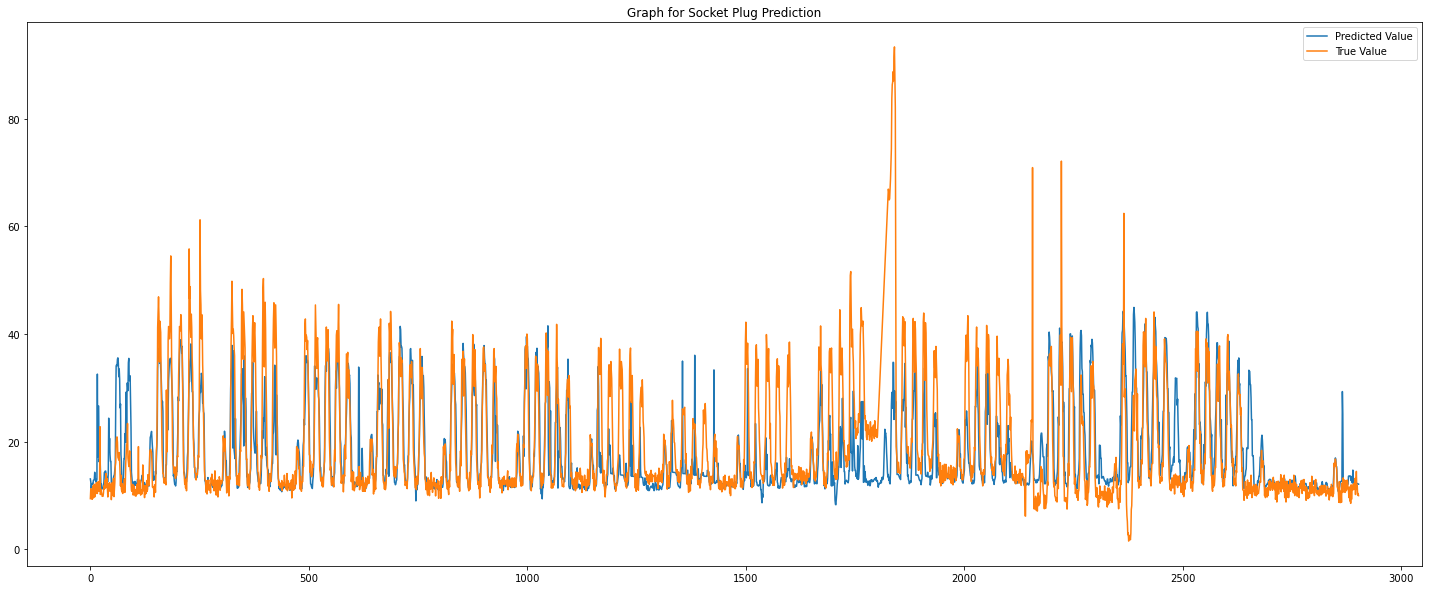

In [59]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [60]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.947102996899759

Root Mean Sqaured Error is:  8.613442633665398

R2 score is:  0.3884980485424182


In [61]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

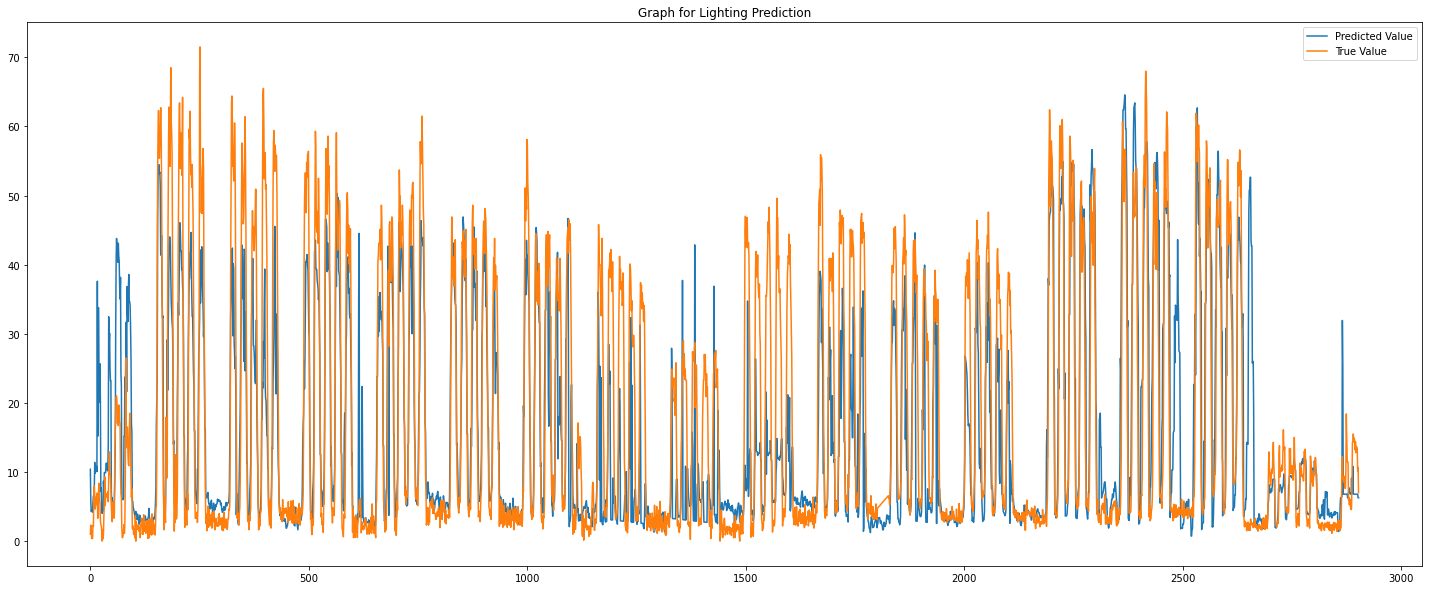

In [62]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [63]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  7.150883568722011

Root Mean Sqaured Error is:  11.228082497257589

R2 score is:  0.6244849856248397


In [64]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

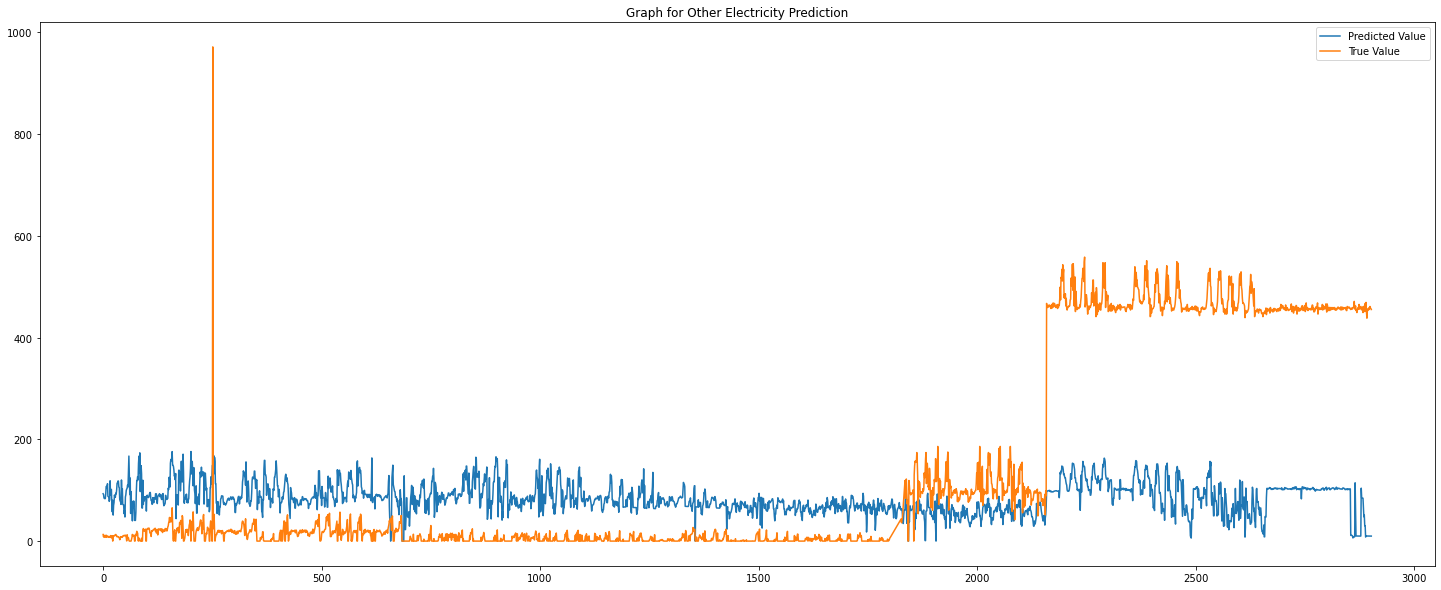

In [65]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [66]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  150.23312569755421

Root Mean Sqaured Error is:  202.8409134364462

R2 score is:  -0.052758984355949945


In [67]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

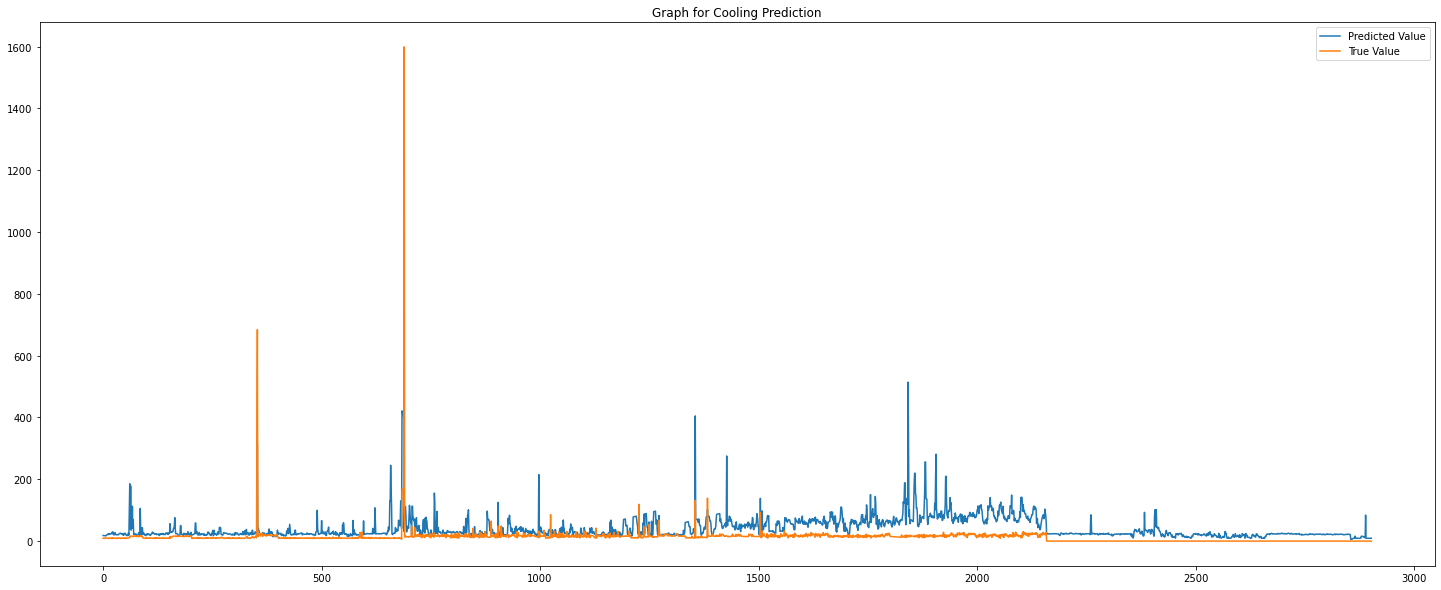

In [68]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [69]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  30.05265242852222

Root Mean Sqaured Error is:  52.06651103410146

R2 score is:  -1.2829393674051284


In [70]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

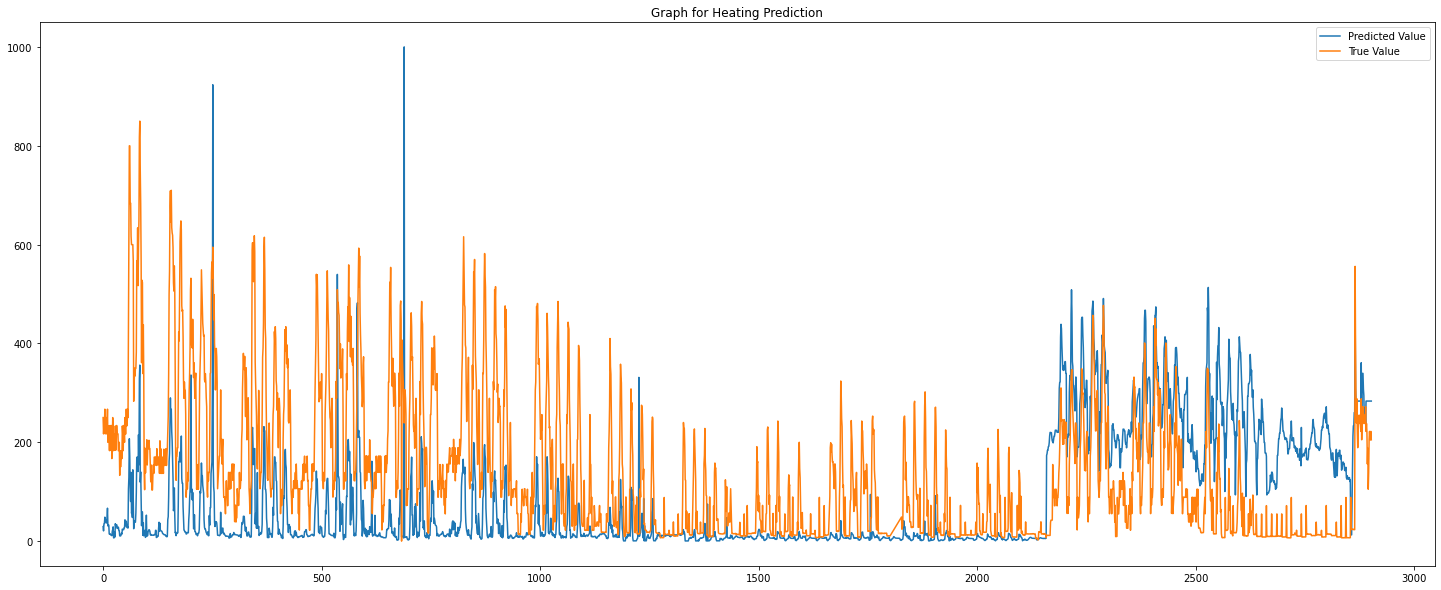

In [71]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [72]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  128.80204271443336

Root Mean Sqaured Error is:  168.21125776182996

R2 score is:  -0.3587516799872772


**Early Morning (1am to 8am)**

In [73]:
X_test1 = df4_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df4_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2088, 8) (2088, 6)


In [74]:
X_test1=sc.fit_transform(X_test1)

In [75]:
pred = model.predict(X_test1)

In [76]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

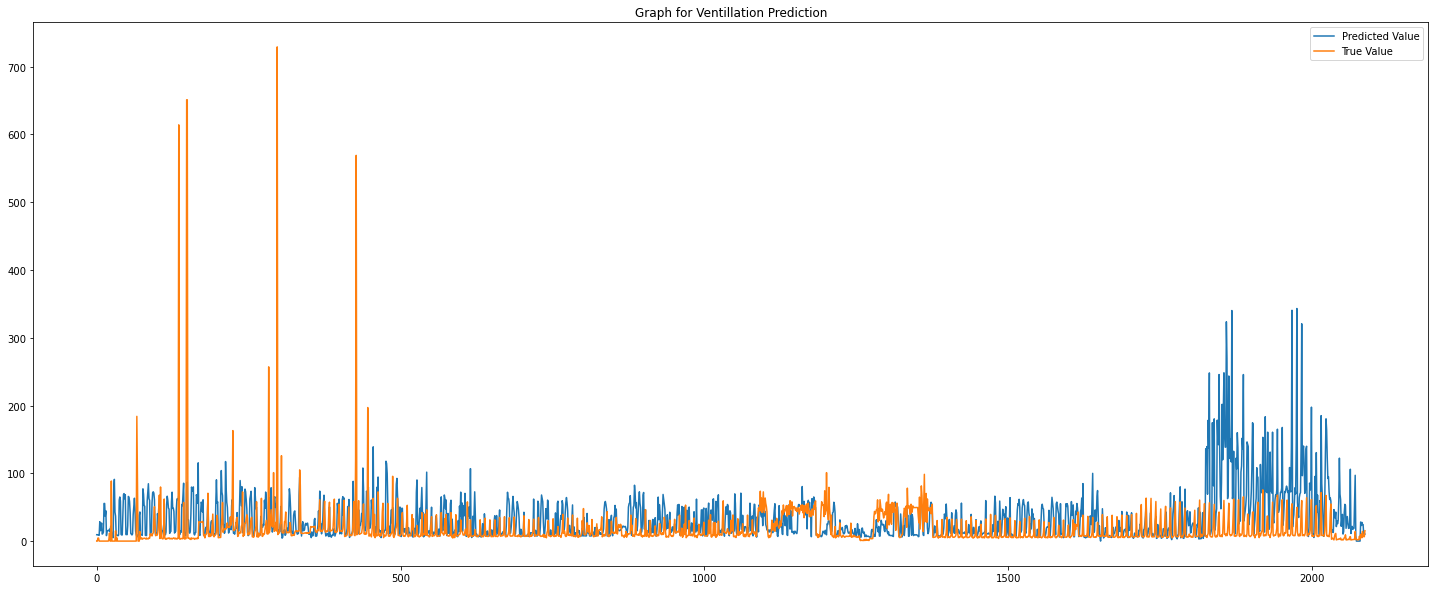

In [77]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [78]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  24.71210153256705

Root Mean Sqaured Error is:  48.29650130016162

R2 score is:  -0.8060287420705852


In [79]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

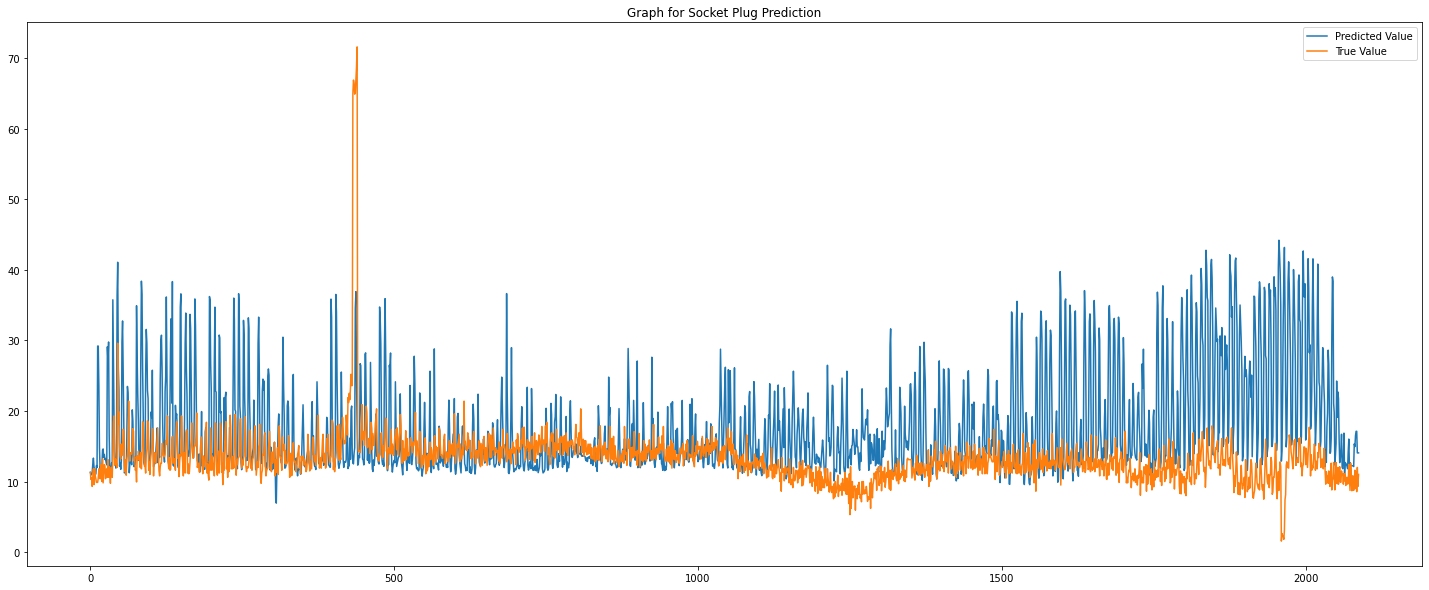

In [80]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [81]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.788280651340997

Root Mean Sqaured Error is:  9.234493476121816

R2 score is:  -3.906406802050239


In [82]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

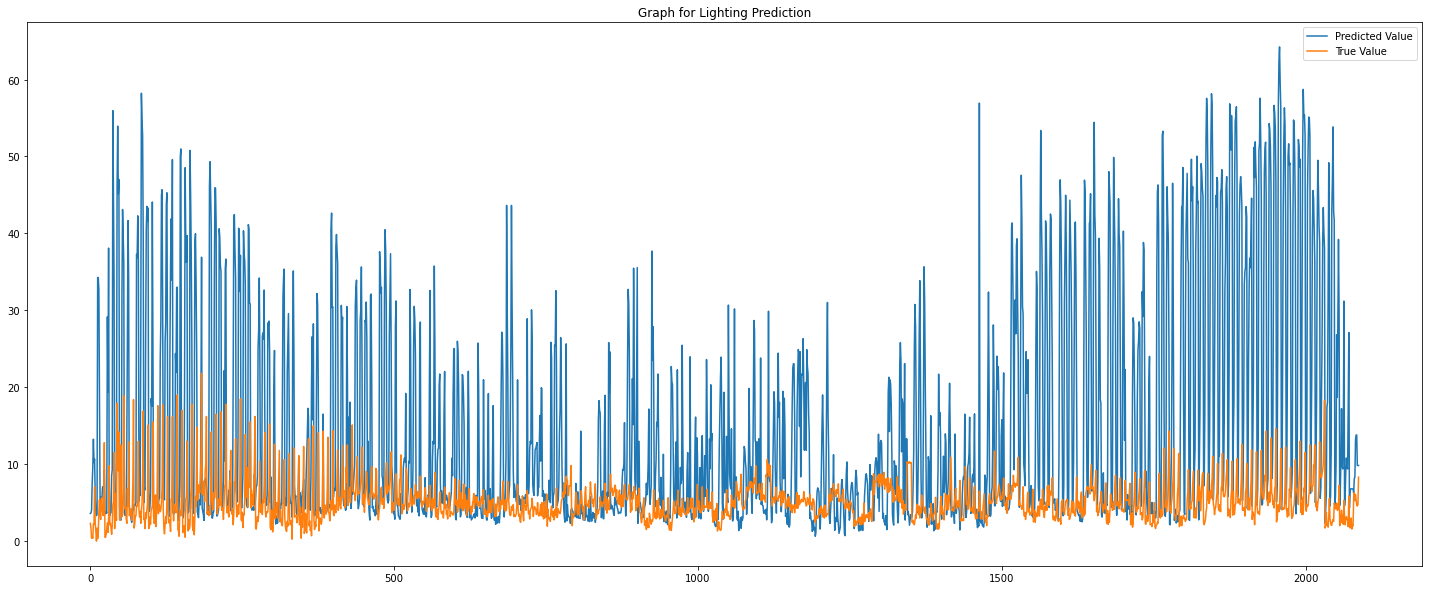

In [83]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [84]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  10.8353280651341

Root Mean Sqaured Error is:  17.2646456363094

R2 score is:  -42.97053956074828


In [85]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

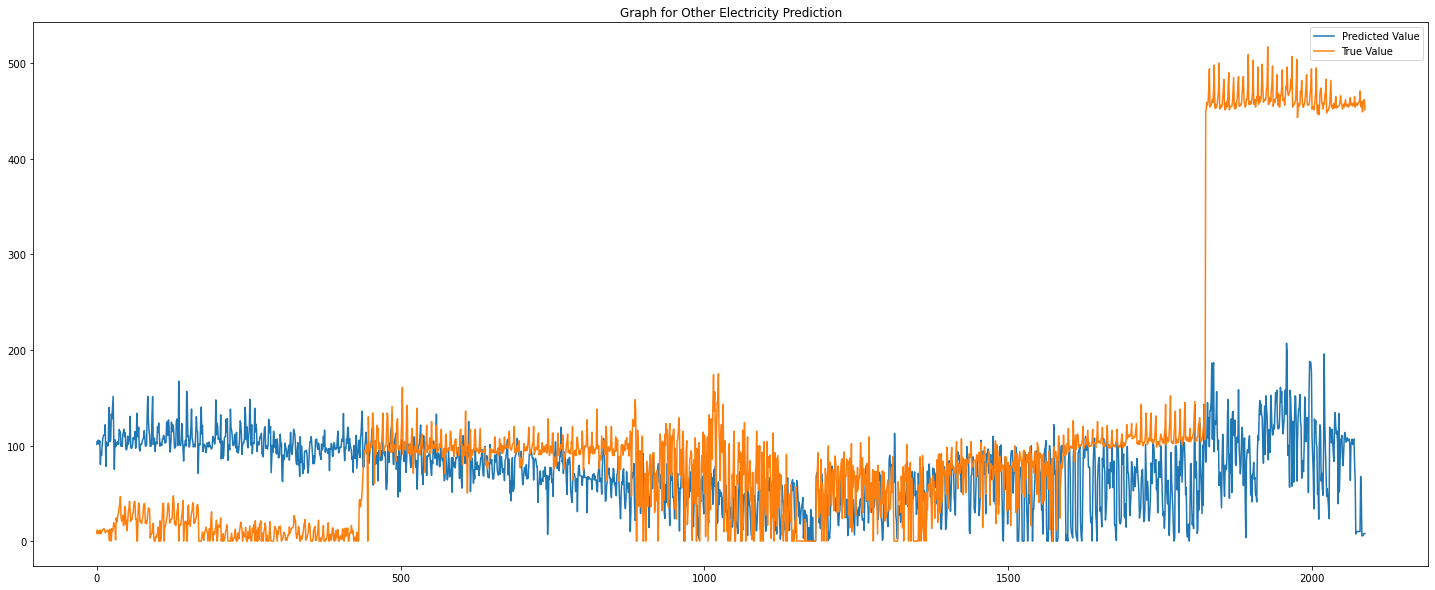

In [86]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [87]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  86.65443999042145

Root Mean Sqaured Error is:  140.7457586909136

R2 score is:  -0.041068136494613494


In [88]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

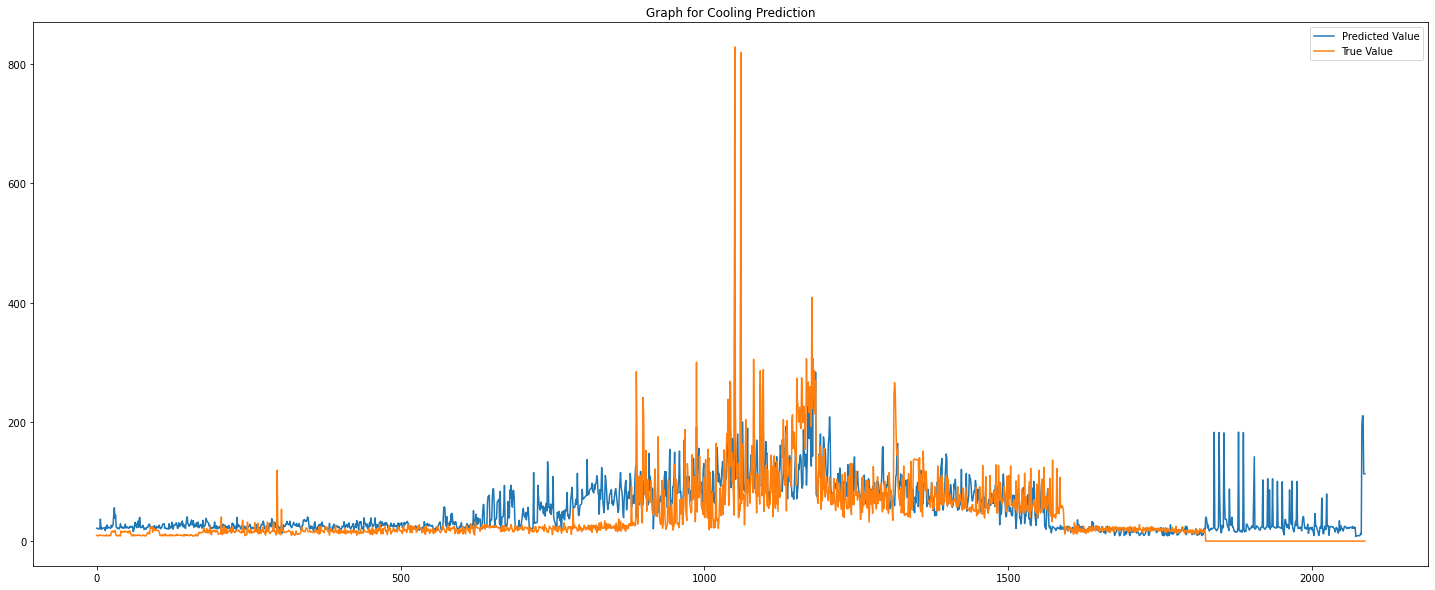

In [89]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [90]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  25.02864559386973

Root Mean Sqaured Error is:  38.79433272782166

R2 score is:  0.4809412115245313


In [91]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

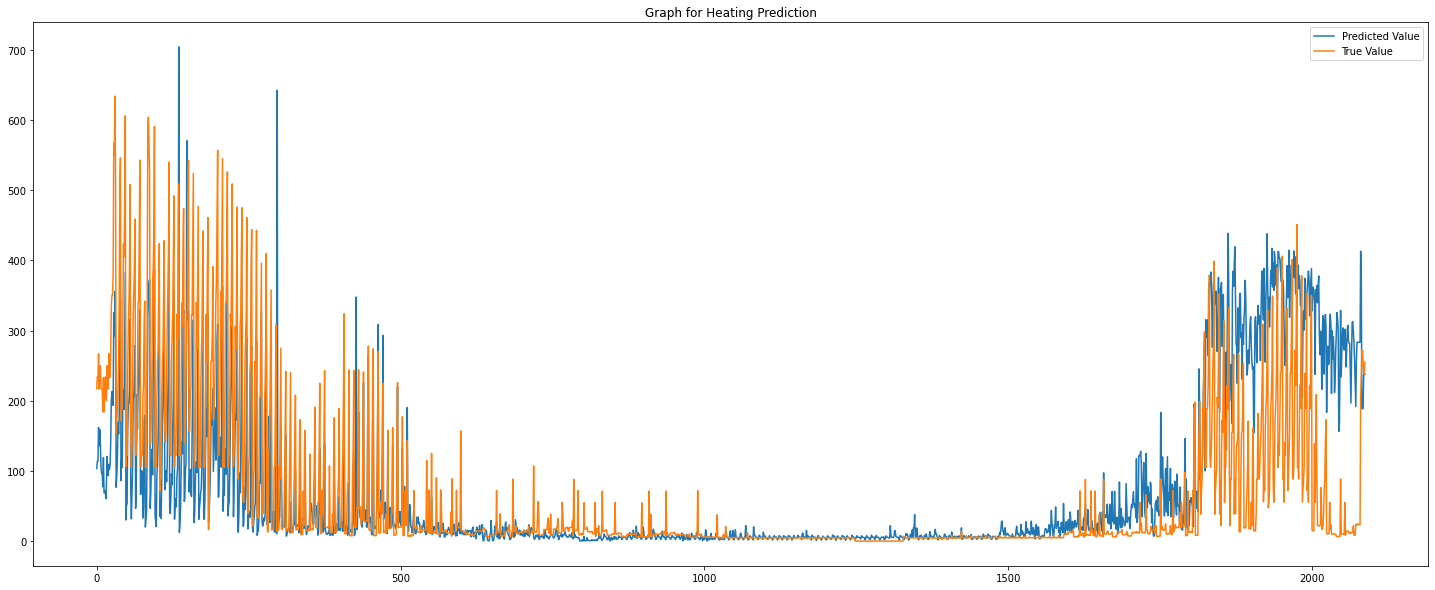

In [92]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [93]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  52.48773448275862

Root Mean Sqaured Error is:  96.37216345536478

R2 score is:  0.24743150947048698


**Working Hours (9am to 7pm)**

In [94]:
X_test1 = df5_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df5_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2871, 8) (2871, 6)


In [95]:
X_test1=sc.fit_transform(X_test1)

In [96]:
pred = model.predict(X_test1)

In [97]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

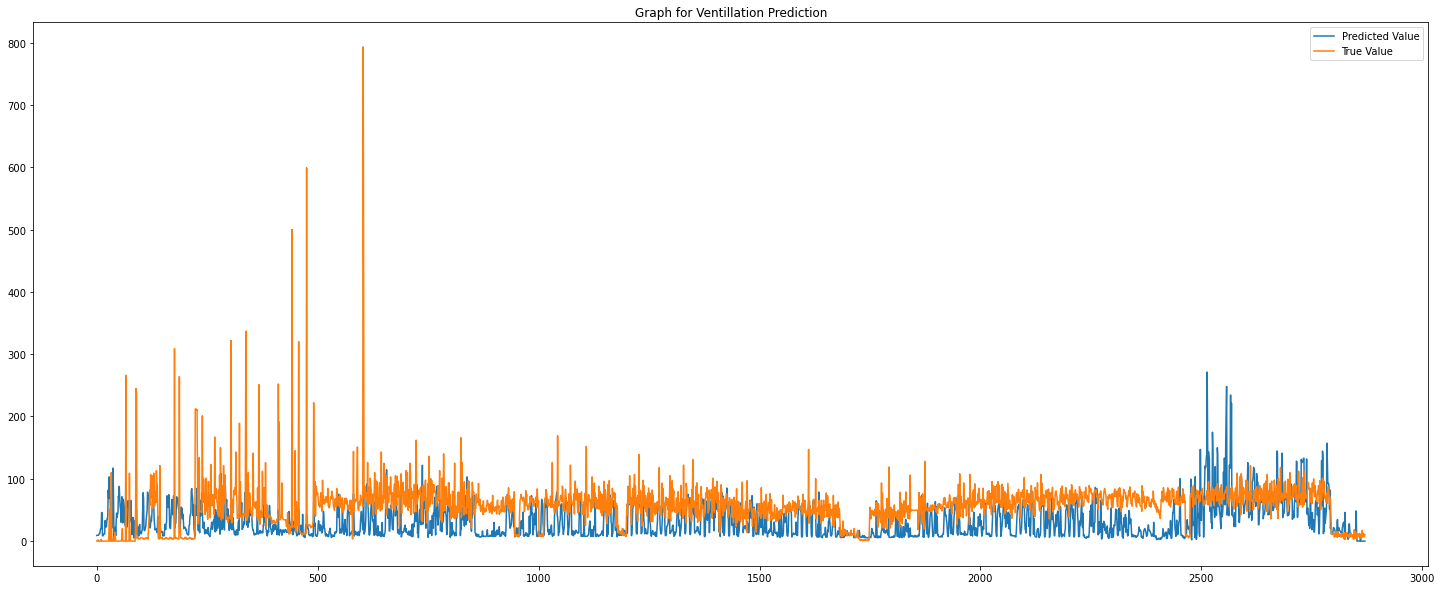

In [98]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [99]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  35.25098195750609

Root Mean Sqaured Error is:  48.44744791492039

R2 score is:  -0.6942611397211575


In [100]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

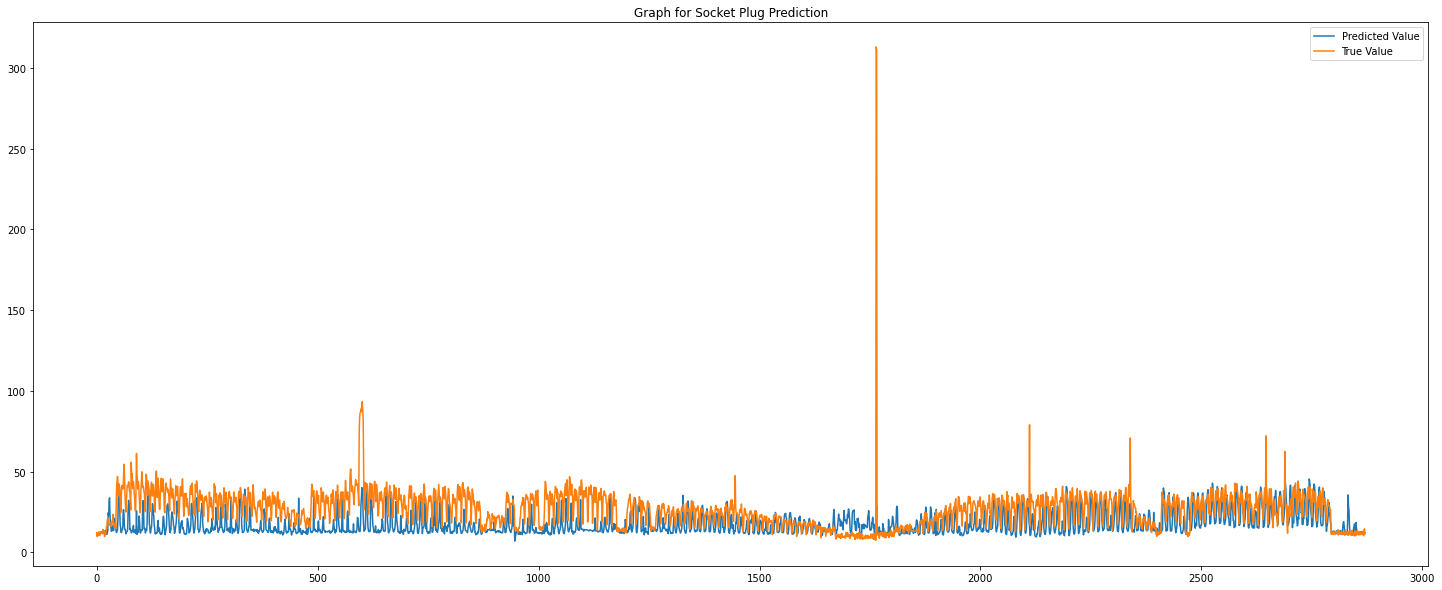

In [101]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [102]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  10.73159177986764

Root Mean Sqaured Error is:  15.542212885311542

R2 score is:  -0.5243683212027408


In [103]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

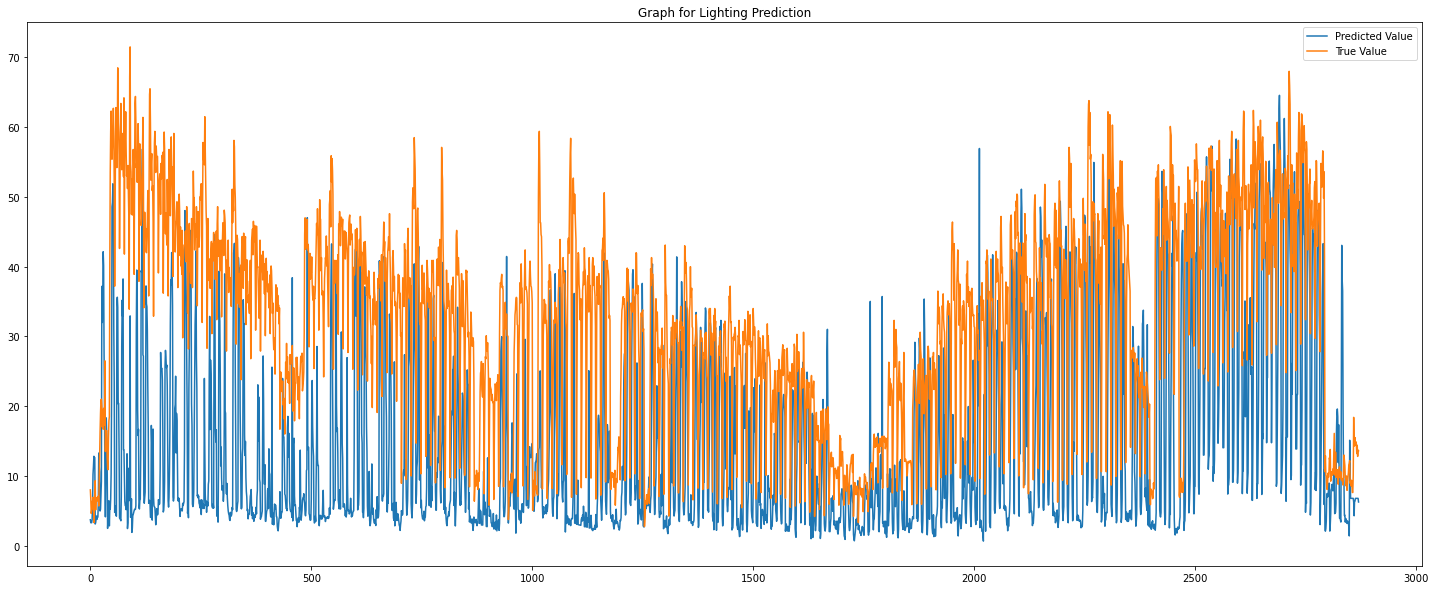

In [104]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [105]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  18.975083594566353

Root Mean Sqaured Error is:  23.25263614996564

R2 score is:  -1.51554540652088


In [106]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

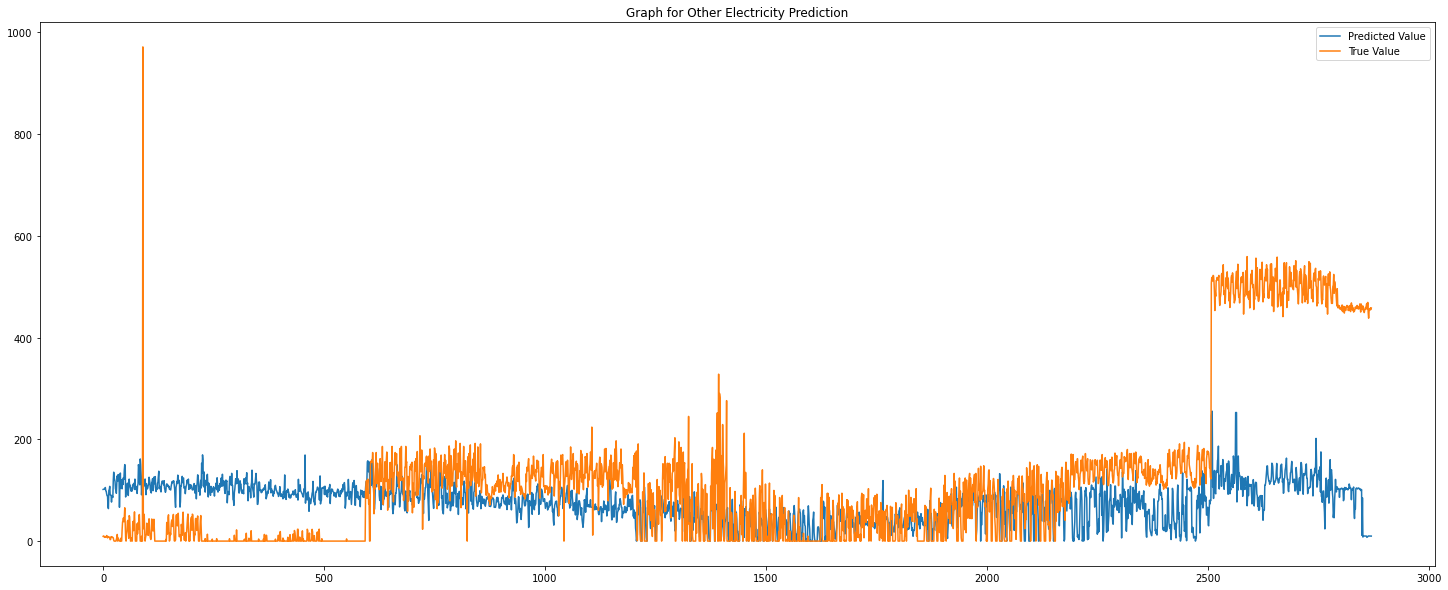

In [107]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [108]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  100.83888624172761

Root Mean Sqaured Error is:  153.0646676671561

R2 score is:  -0.003695143012383273


In [109]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

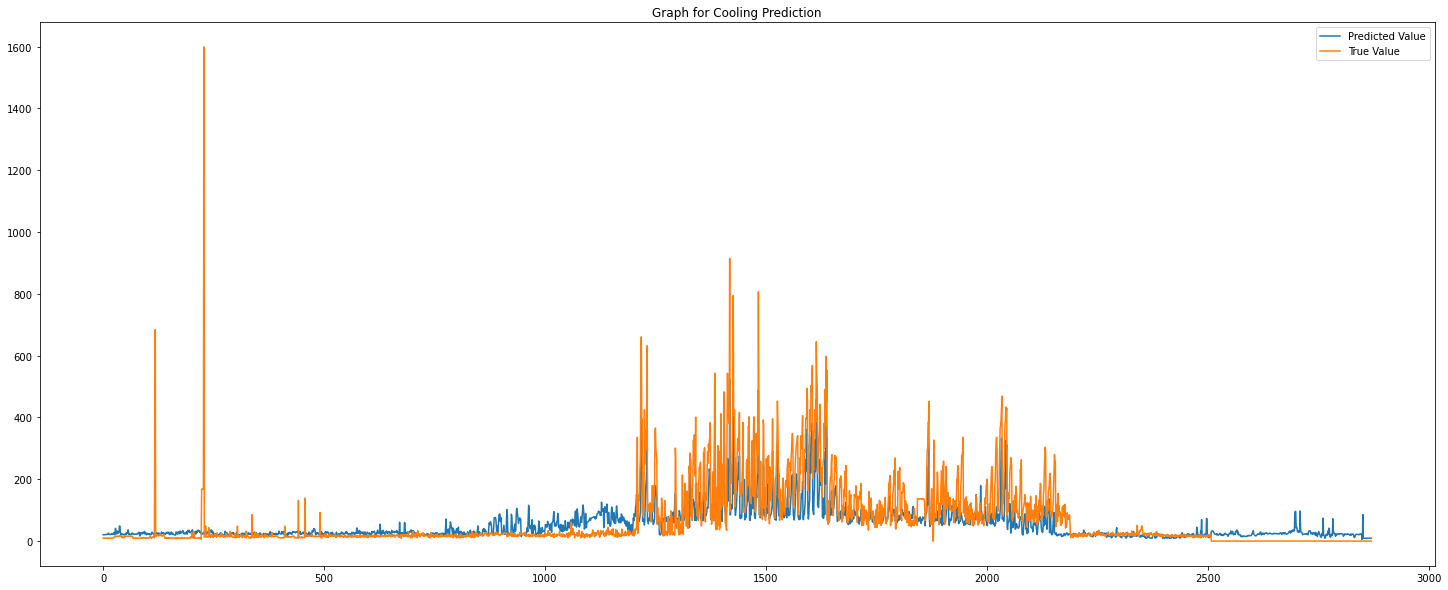

In [110]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [111]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  37.94020132358063

Root Mean Sqaured Error is:  68.70943803707213

R2 score is:  0.5682418365398342


In [112]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

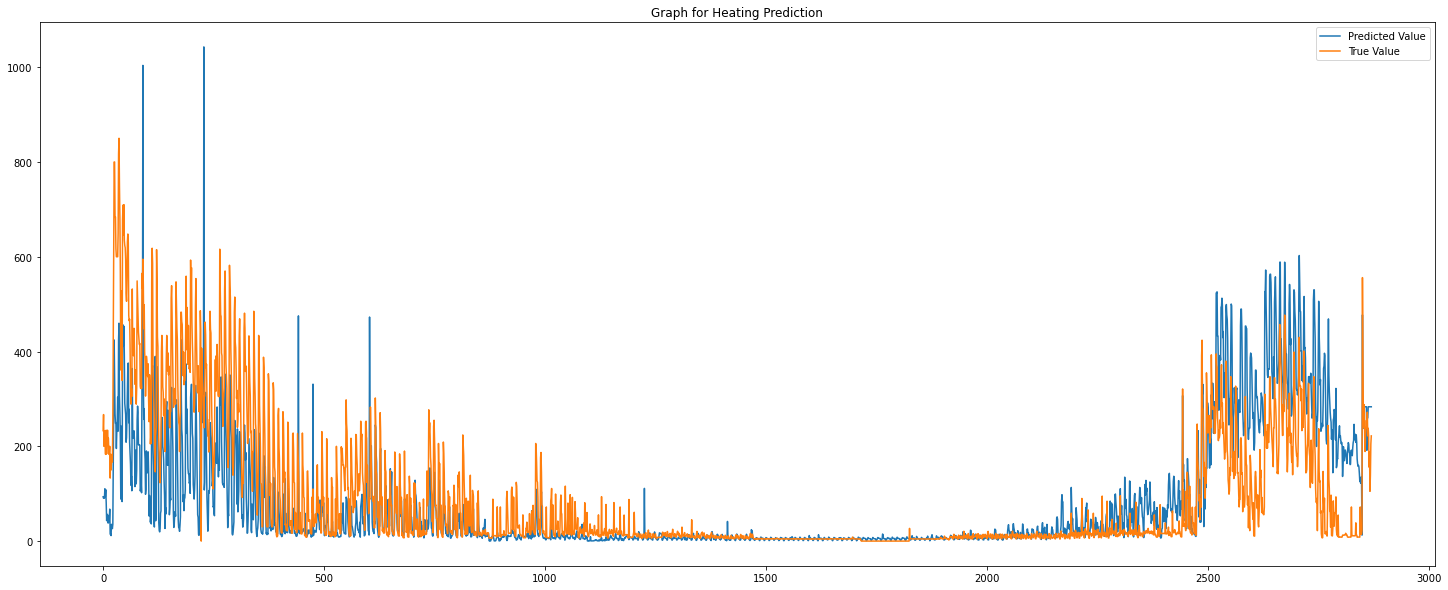

In [113]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [114]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  62.03813333333333

Root Mean Sqaured Error is:  104.66375042402954

R2 score is:  0.42499224557499804


**Night (8pm to 12am)**

In [115]:
X_test1 = df6_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df6_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(1305, 8) (1305, 6)


In [116]:
X_test1=sc.fit_transform(X_test1)

In [117]:
pred = model.predict(X_test1)

In [118]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

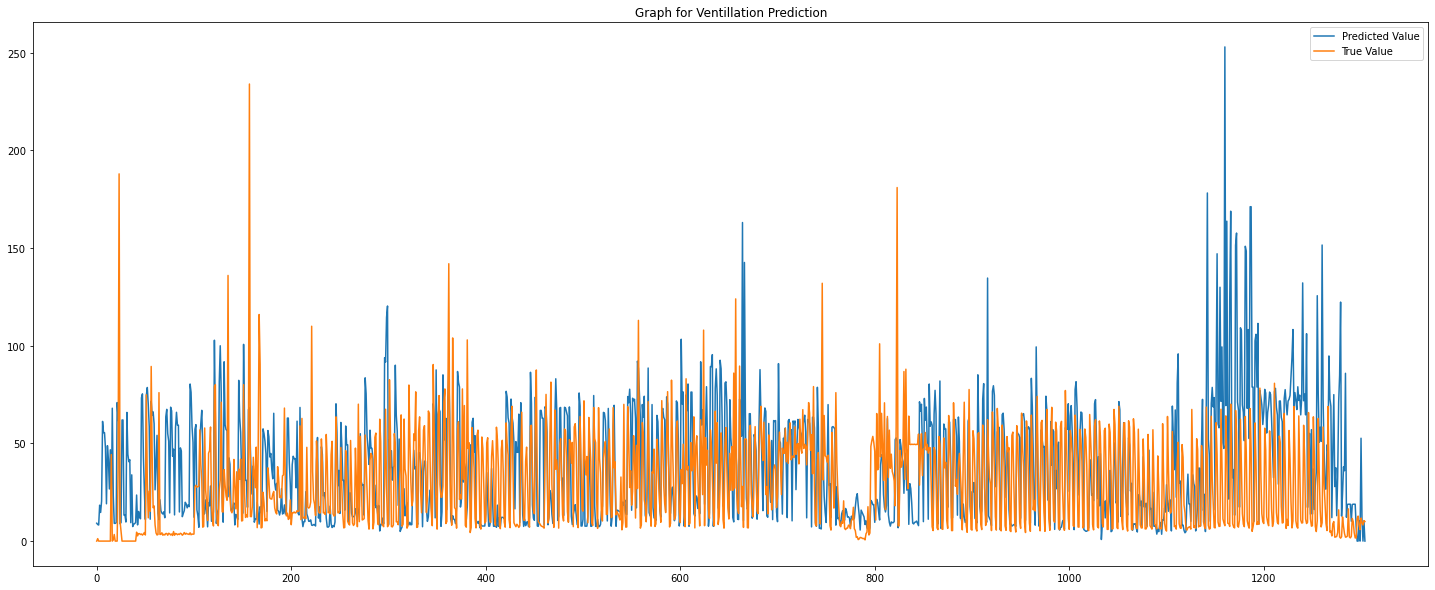

In [119]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [120]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  23.73334620689655

Root Mean Sqaured Error is:  33.5818948084508

R2 score is:  -0.8019508866975811


In [121]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

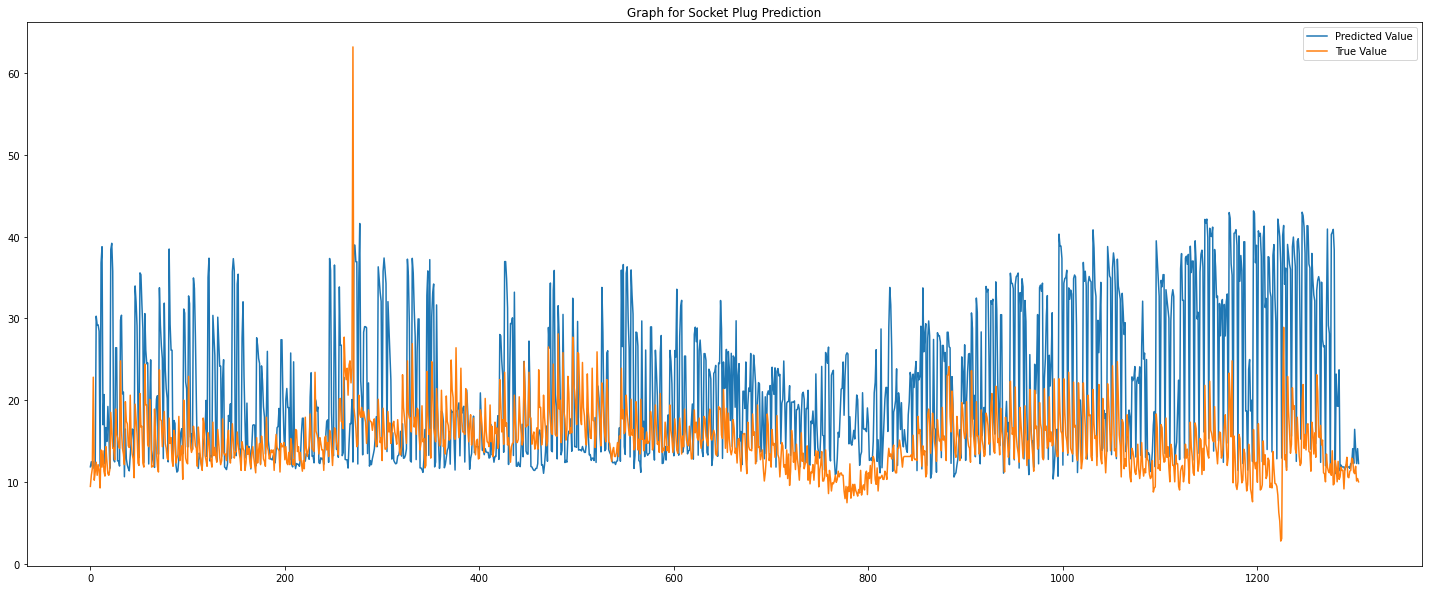

In [122]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [123]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  8.11336704980843

Root Mean Sqaured Error is:  11.094192103143696

R2 score is:  -7.687134513065212


In [124]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

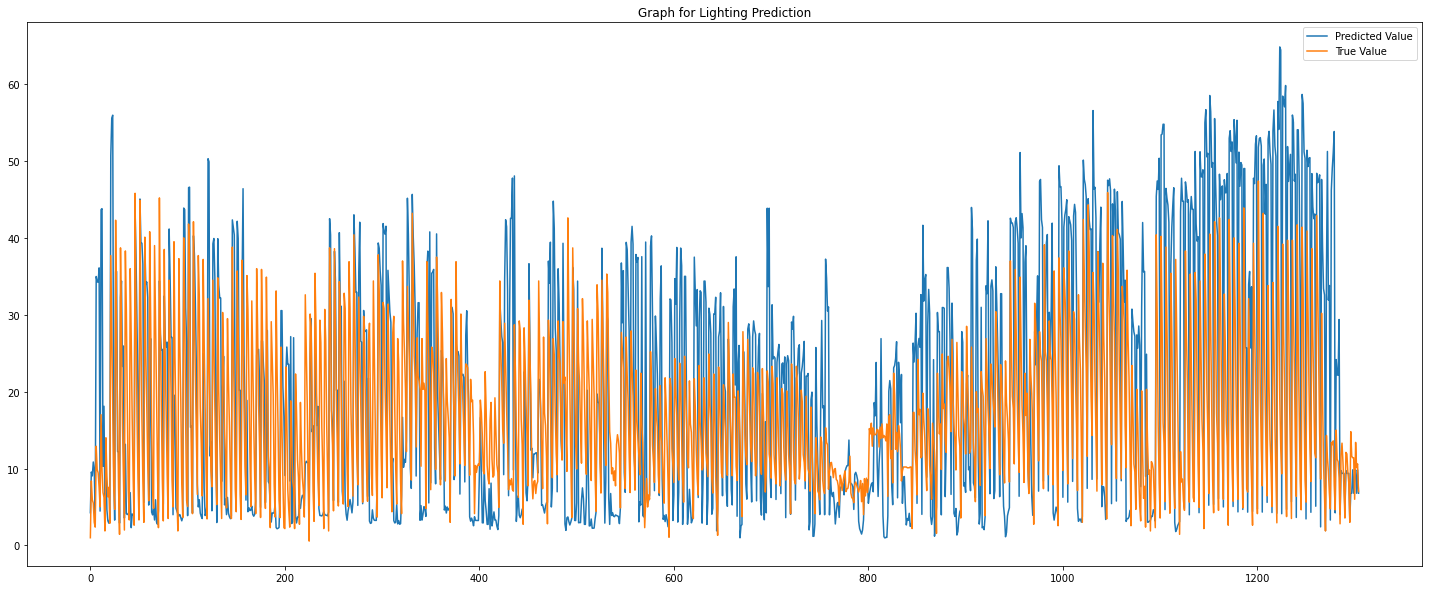

In [125]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [126]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  10.863437854406131

Root Mean Sqaured Error is:  14.561173862757629

R2 score is:  -1.111090169966138


In [127]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

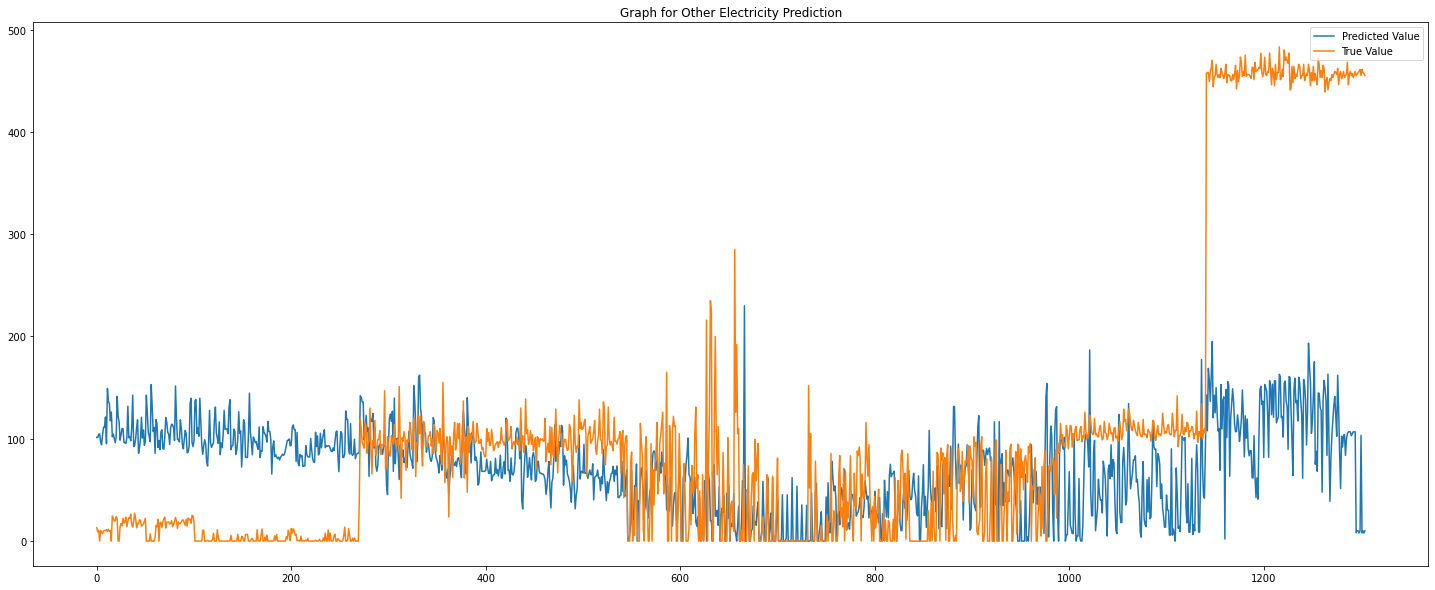

In [128]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [129]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  87.68791195402298

Root Mean Sqaured Error is:  136.57244769443574

R2 score is:  0.059126635568650054


In [130]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

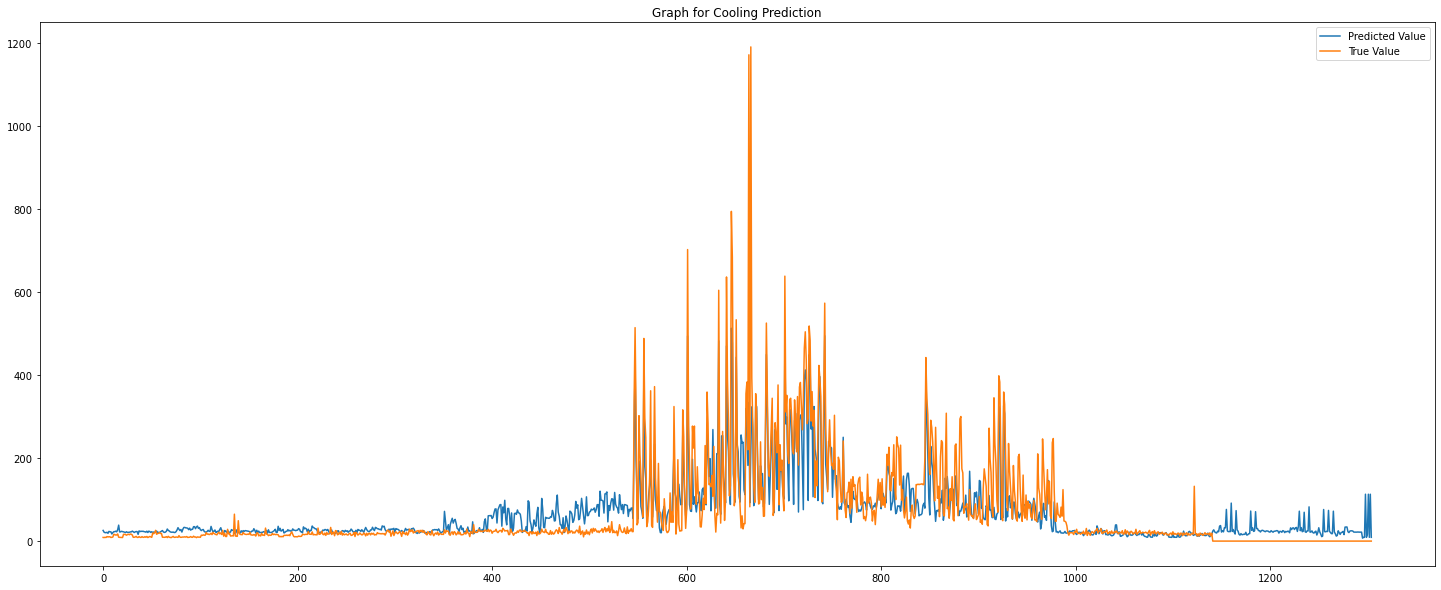

In [131]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [132]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  32.73211187739464

Root Mean Sqaured Error is:  60.83611917984551

R2 score is:  0.6967305604734468


In [133]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

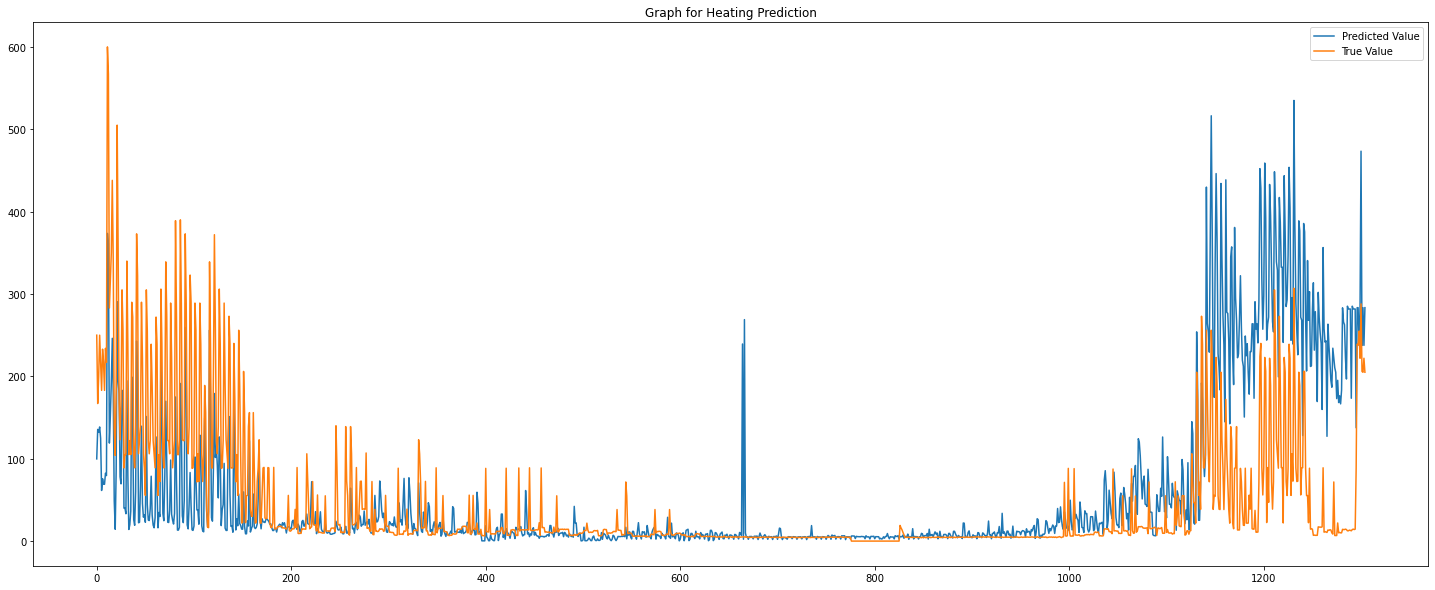

In [134]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [135]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  46.854628199233716

Root Mean Sqaured Error is:  85.75819148539551

R2 score is:  -0.2394161020313148


**Weekends (Saturday and Sunday)**

In [136]:
X_test1 = df7_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df7_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2496, 8) (2496, 6)


In [137]:
X_test1=sc.fit_transform(X_test1)

In [138]:
pred = model.predict(X_test1)

In [139]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

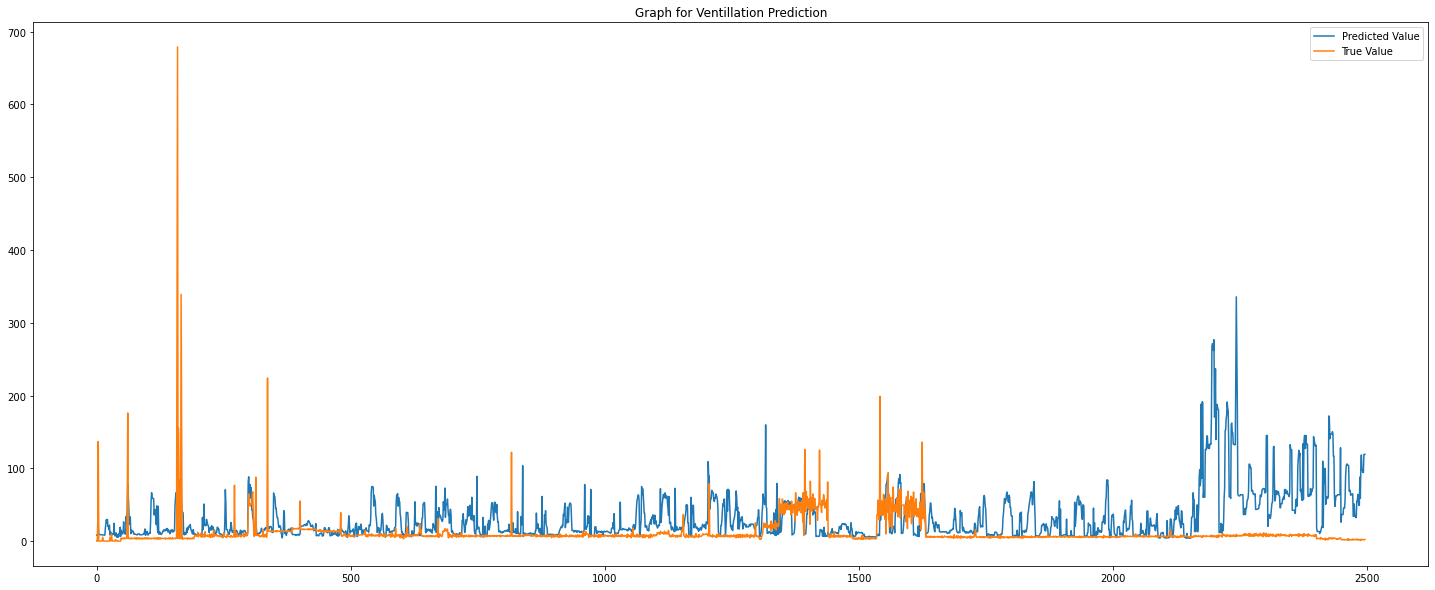

In [140]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [141]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  24.625755128205128

Root Mean Sqaured Error is:  43.655375840661996

R2 score is:  -2.7696358986233136


In [142]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

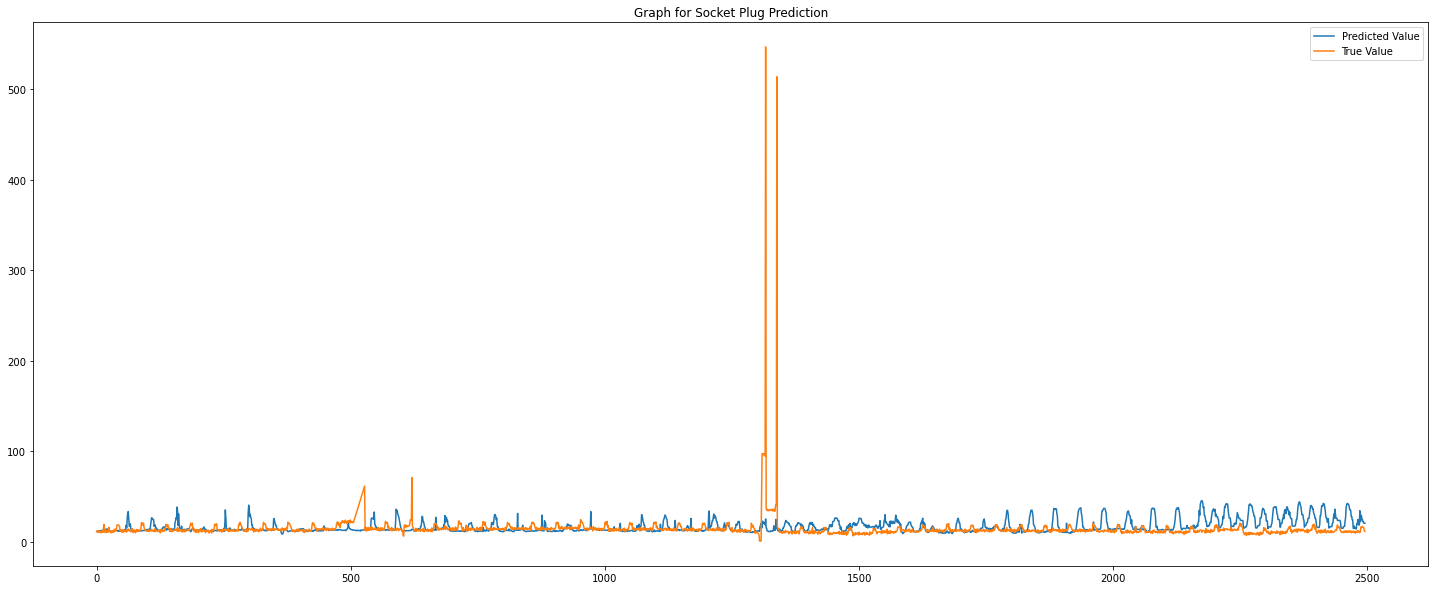

In [143]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [144]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  6.801502804487179

Root Mean Sqaured Error is:  17.697205637710535

R2 score is:  -0.22437967690706606


In [145]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

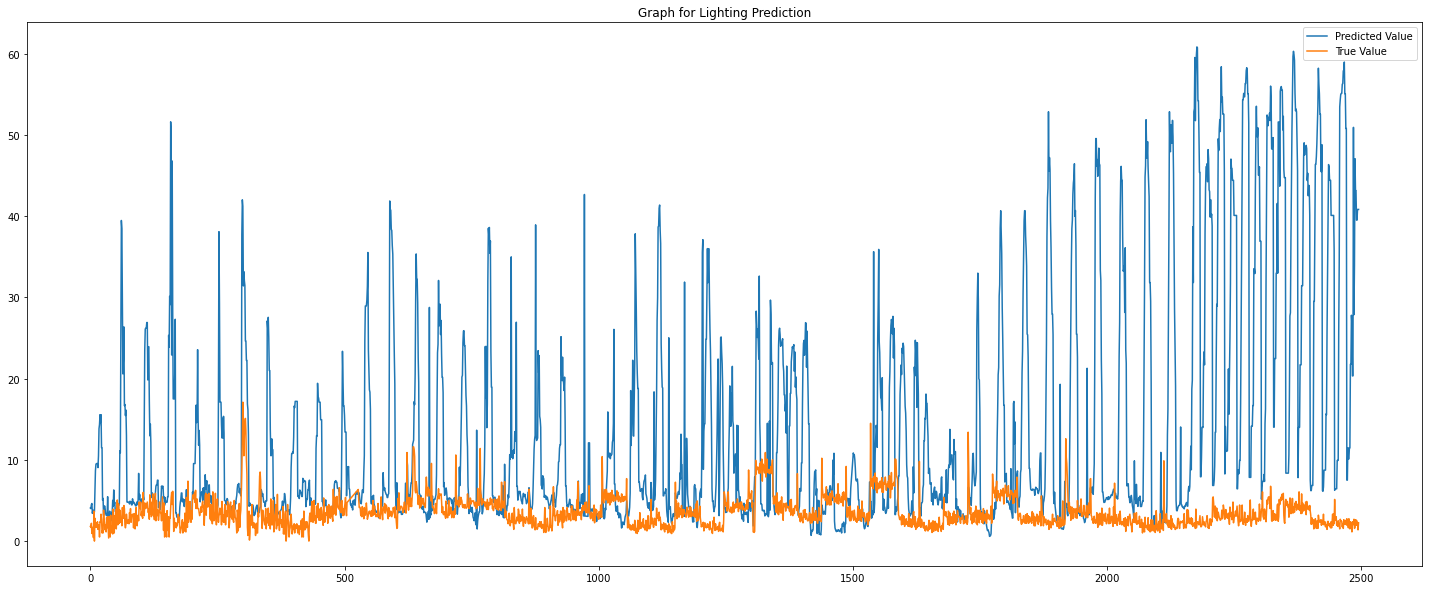

In [146]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [147]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  10.492739423076923

Root Mean Sqaured Error is:  17.447316620844042

R2 score is:  -88.32004680530162


In [148]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

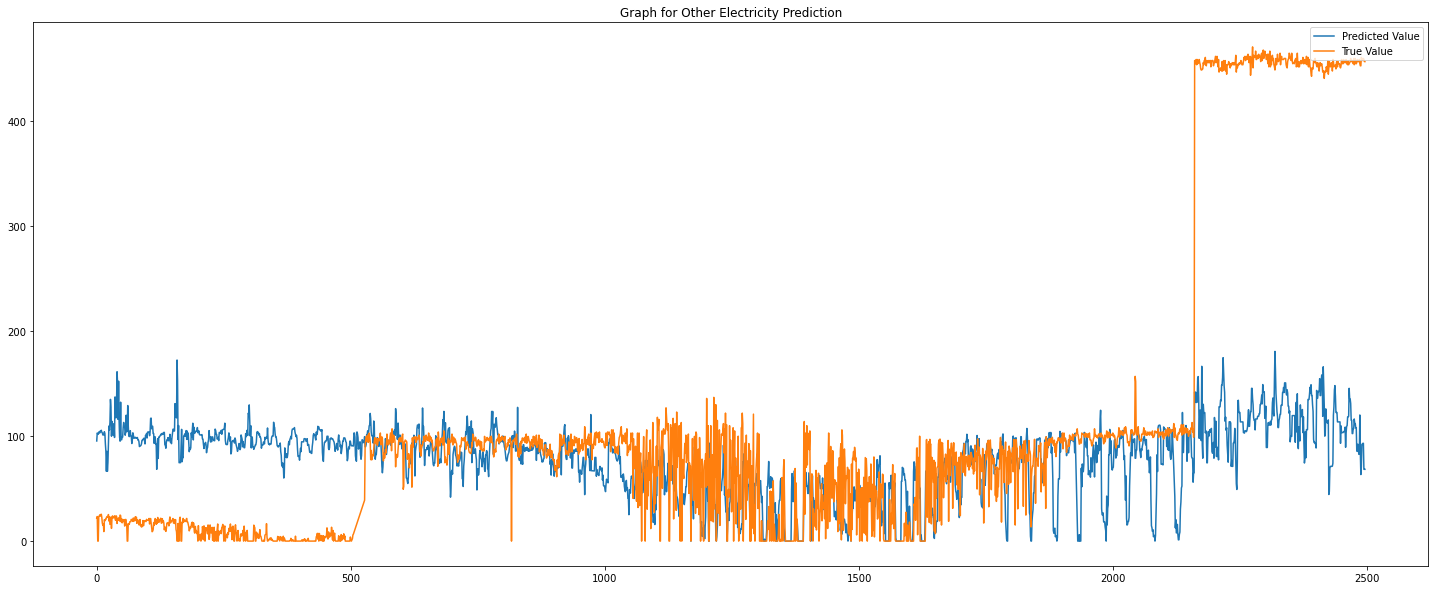

In [149]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [150]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  80.23077455929489

Root Mean Sqaured Error is:  134.97481488130725

R2 score is:  0.08025191825998124


In [151]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

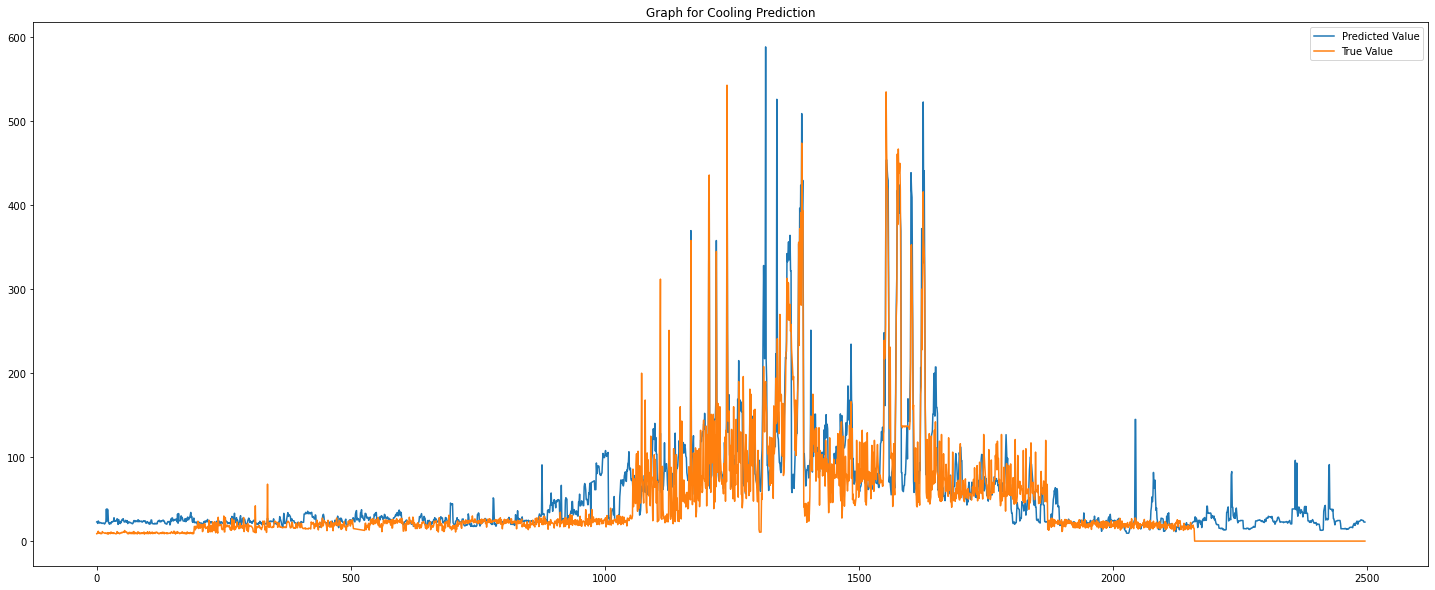

In [152]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [153]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  20.91799439102564

Root Mean Sqaured Error is:  32.66909369247178

R2 score is:  0.7179614588907814


In [154]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

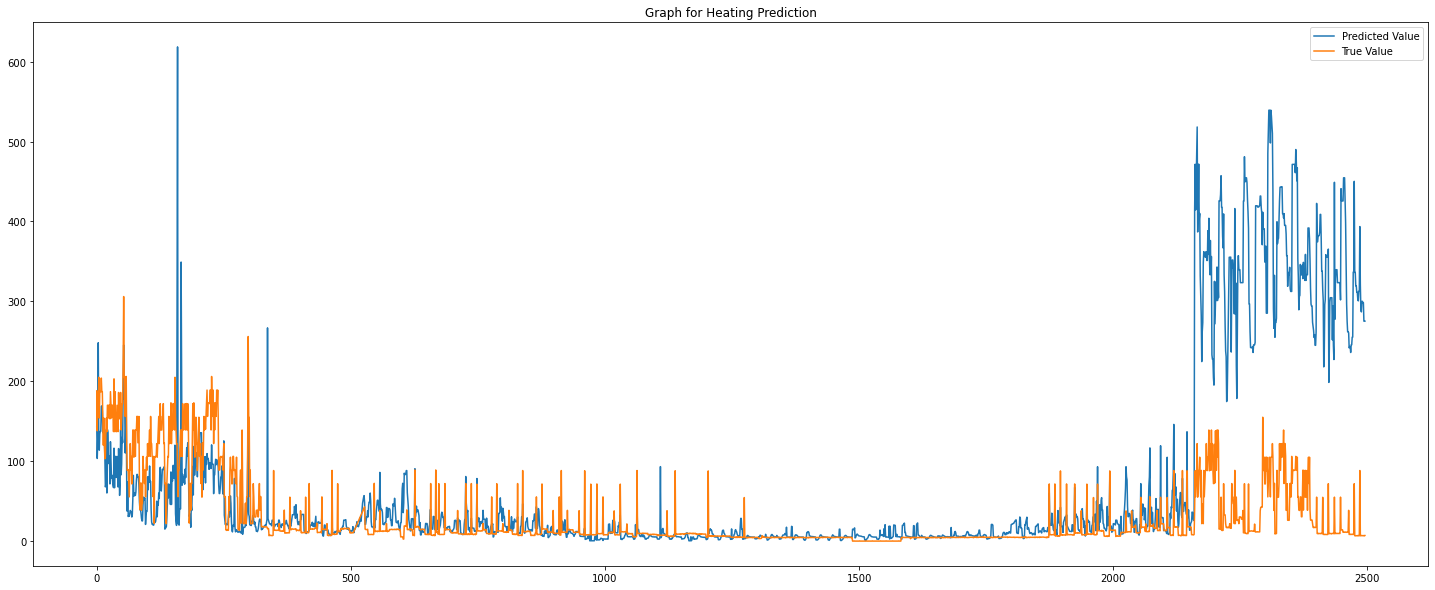

In [155]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [156]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  54.49440761217948

Root Mean Sqaured Error is:  117.57051589681497

R2 score is:  -6.204688385597951
